# import modules

In [6]:
import glob
import sys

sys.path.insert(0, "../")

from modules.contours_ver1 import *
from modules.default_params_ver1 import *
from modules.plot_utils import *

# as a function of $\Delta t_d$ while fixing $I$

In [7]:
filepath = "../data/TACC_contours_mcz20_td_2024-05-06.pkl"
with open(filepath, "rb") as f:
    data_td = pickle.load(f)

data_td = get_contours_stats(data_td, thres_factor=1.01, thres_diff=0)

data_td

{0.007832: {'contour': {'omega_matrix': array([[0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          ...,
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ]]),
   'theta_matrix': array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
          [0.125, 0.125, 0.125, ..., 0.125, 0.125, 0.125],
          [0.25 , 0.25 , 0.25 , ..., 0.25 , 0.25 , 0.25 ],
          ...,
          [7.75 , 7.75 , 7.75 , ..., 7.75 , 7.75 , 7.75 ],
          [7.875, 7.875, 7.875, ..., 7.875, 7.875, 7.875],
          [8.   , 8.   , 8.   , ..., 8.   , 8.   , 8.   ]]),
   'epsilon_matrix': array([[0.08788262, 0.08788262, 0.08788262, ..., 0.08788262, 0.08788262,
           0.08788262],
          [0.0873312 , 0.0872164 , 0.08695021, ..., 0.08433622, 0.08437234,
           0.0844096 ],
          [0.08675679, 0.08653718, 0.086018  , ..., 0.08089

In [8]:
mcz = 20
td_max = data_td["td_arr"][-1]
print("max td:", td_max)
print("max cycles in lensed:", td_max * (get_fcut_from_mcz(mcz) - 20))

RP_params = copy.deepcopy(RP_params_1)
RP_params["mcz"] = mcz * solar_mass
RP_params["omega_tilde"] = 3

print(get_lens_limits_for_RP_L(RP_params, lower=0.5))
xlim = get_lens_limits_for_RP_L(RP_params, lower=0.5)["td_max"]
print("max cycles in precessing:", xlim * (get_fcut_from_mcz(mcz) - 20))

max td: 0.041535
max cycles in lensed: 3.143556038629776
{'MLz_min': 668.7911346330674, 'MLz_max': 3214.5359216230086, 'td_min': 0.00660637181103099, 'td_max': 0.03175344049649842}
max cycles in precessing: 2.403243520405414


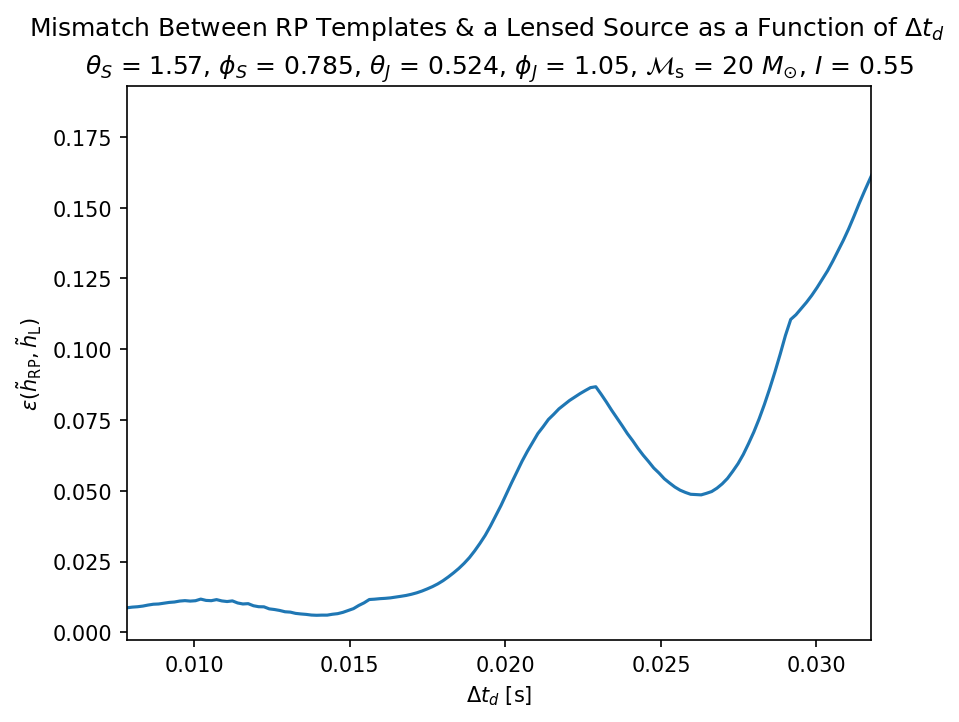

In [10]:
src_params = data_td["source_params"]
td_arr = data_td["td_arr"]
td_ep_min_arr = np.array([data_td[td]["stats"]["ep_min"] for td in td_arr])

plt.plot(td_arr, td_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$\Delta t_d$ [s]")
plt.xlim(td_arr[0], xlim)
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

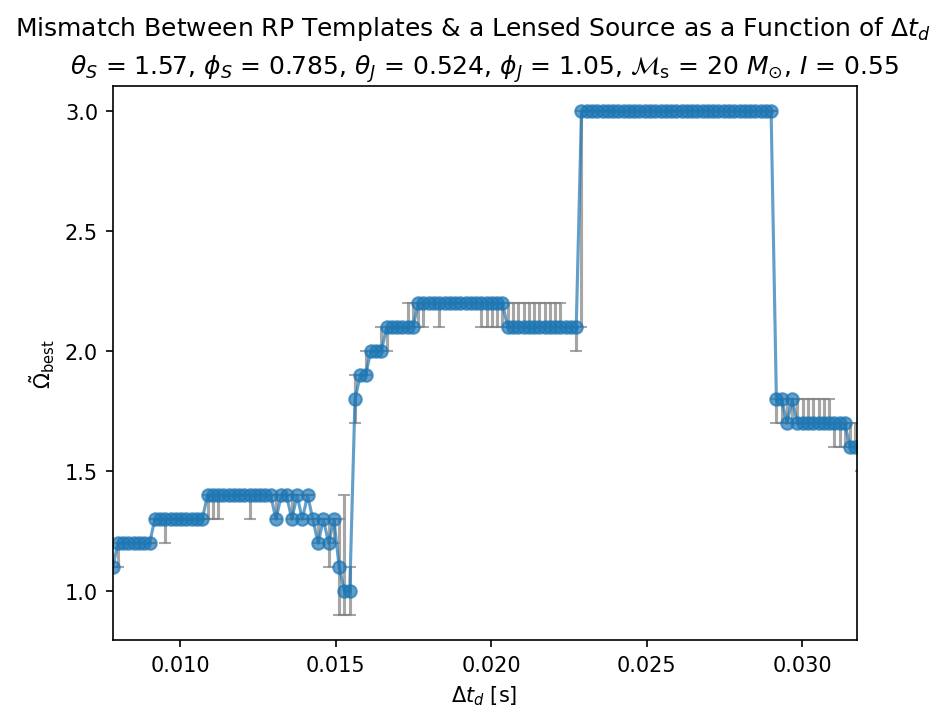

In [11]:
src_params = data_td["source_params"]
td_arr = data_td["td_arr"]
td_best_omega_arr = np.array(
    [data_td[td]["stats"]["ep_min_omega_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_best_omega_arr,
    yerr=get_asym_err(data_td, td_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.xlim(td_arr[0], xlim)
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

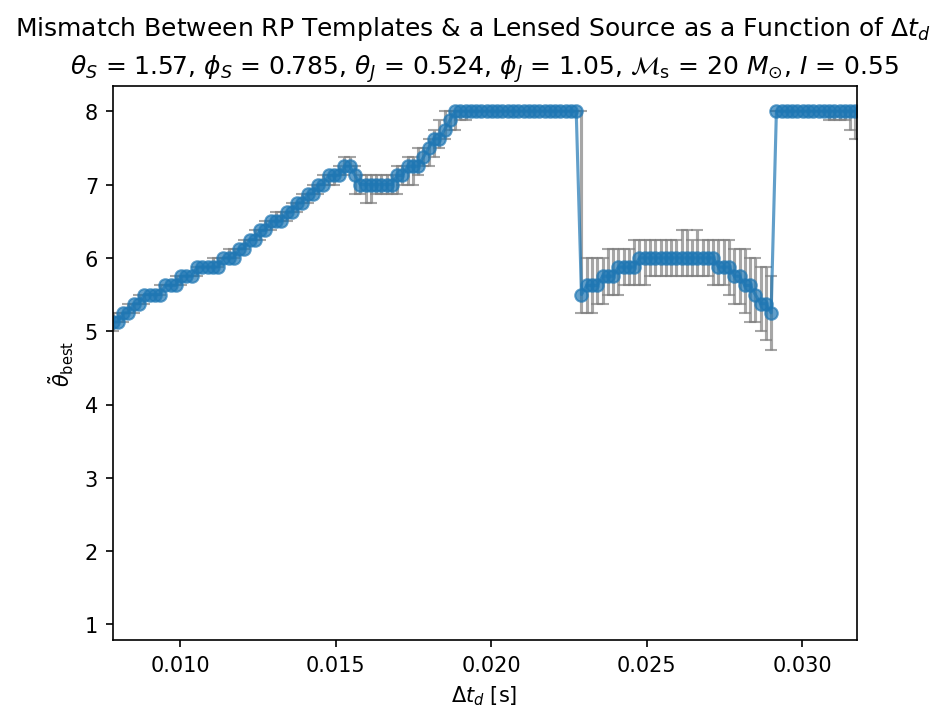

In [12]:
src_params = data_td["source_params"]
td_arr = data_td["td_arr"]
td_best_theta_arr = np.array(
    [data_td[td]["stats"]["ep_min_theta_tilde"] for td in td_arr]
)

plt.errorbar(
    td_arr,
    td_best_theta_arr,
    yerr=get_asym_err(data_td, td_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=3,
    ecolor="grey",
    alpha=0.7,
)
plt.xlabel(r"$\Delta t_d$ [s]")
plt.xlim(td_arr[0], xlim)
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $I$ = {:.3g}".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_td["I"],
    )
)

plt.suptitle(
    r"Mismatch Between RP Templates & a Lensed Source as a Function of $\Delta t_d$"
)

plt.show()

# as a function of $I$ while fixing $\Delta t_d$

In [15]:
filepath = "../data/TACC_contours_mcz20_I_2024-05-06.pkl"
with open(filepath, "rb") as f:
    data_I = pickle.load(f)

data_I = get_contours_stats(data_I, thres_factor=1.01, thres_diff=0)

data_I

{0.008404: {'contour': {'omega_matrix': array([[0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          ...,
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ],
          [0. , 0.1, 0.2, ..., 2.8, 2.9, 3. ]]),
   'theta_matrix': array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
          [0.125, 0.125, 0.125, ..., 0.125, 0.125, 0.125],
          [0.25 , 0.25 , 0.25 , ..., 0.25 , 0.25 , 0.25 ],
          ...,
          [7.75 , 7.75 , 7.75 , ..., 7.75 , 7.75 , 7.75 ],
          [7.875, 7.875, 7.875, ..., 7.875, 7.875, 7.875],
          [8.   , 8.   , 8.   , ..., 8.   , 8.   , 8.   ]]),
   'epsilon_matrix': array([[0.00413384, 0.00413384, 0.00413384, ..., 0.00413384, 0.00413384,
           0.00413384],
          [0.00412296, 0.00412043, 0.00411983, ..., 0.00334427, 0.00332876,
           0.00331529],
          [0.00411338, 0.00410745, 0.0041061 , ..., 0.00267

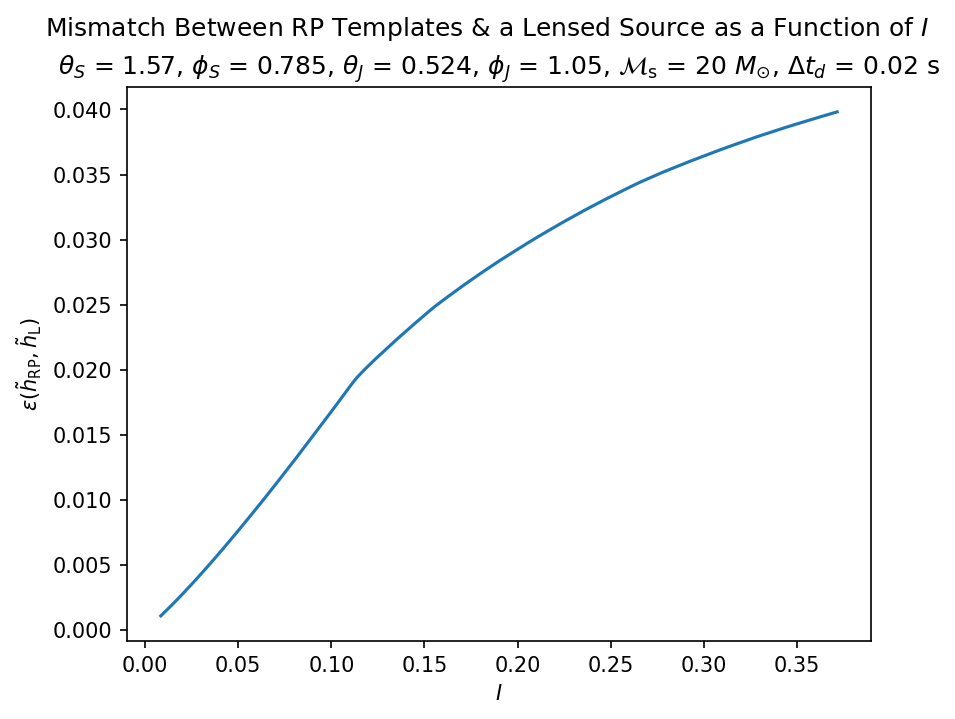

In [16]:
src_params = data_I["source_params"]
I_arr = data_I["I_arr"]
I_ep_min_arr = np.array([data_I[I]["stats"]["ep_min"] for I in I_arr])

plt.plot(I_arr, I_ep_min_arr, label=r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")
plt.xlabel(r"$I$")
plt.ylabel(r"$\epsilon(\~h_{\rm RP}, \~h_{\rm L})$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

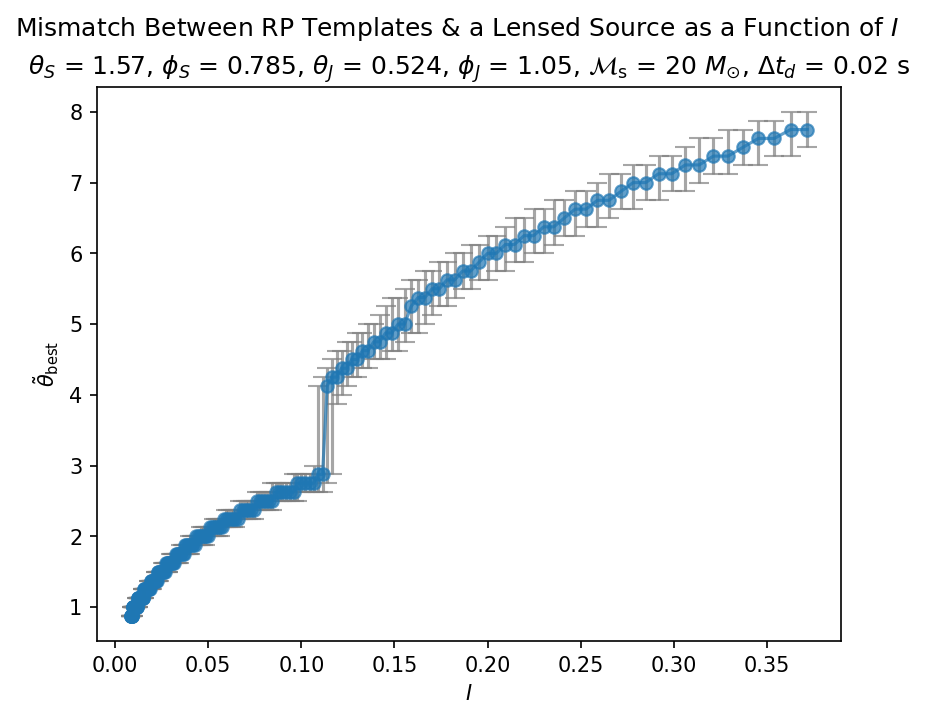

In [17]:
src_params = data_I["source_params"]
I_arr = data_I["I_arr"]
I_best_theta_arr = np.array([data_I[I]["stats"]["ep_min_theta_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_theta_arr,
    yerr=get_asym_err(data_I, I_arr, "theta_tilde"),
    fmt="-o",
    label=r"$\~{\theta}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\theta}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

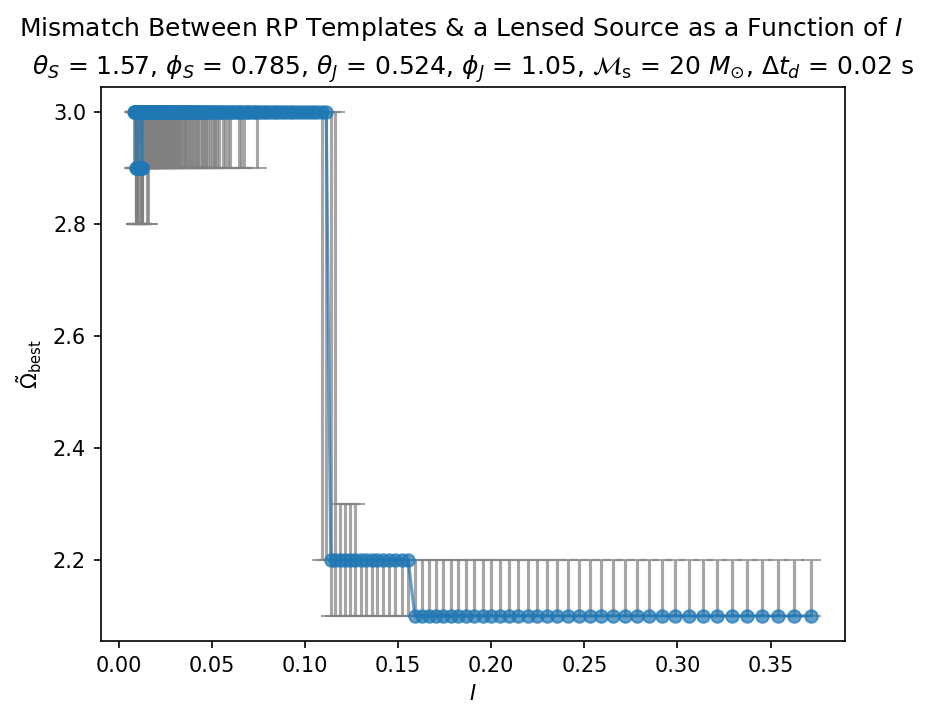

In [18]:
src_params = data_I["source_params"]
I_arr = data_I["I_arr"]
I_best_omega_arr = np.array([data_I[I]["stats"]["ep_min_omega_tilde"] for I in I_arr])

plt.errorbar(
    I_arr,
    I_best_omega_arr,
    yerr=get_asym_err(data_I, I_arr, "omega_tilde"),
    fmt="-o",
    label=r"$\~{\Omega}_{\rm best}$",
    capsize=5,
    ecolor="grey",
    alpha=0.7,
)

plt.xlabel(r"$I$")
plt.ylabel(r"$\~{\Omega}_{\rm best}$")

plt.title(
    r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, {} = {:.3g} {}, $\Delta t_d$ = {:.3g} s".format(
        src_params["theta_S"],
        src_params["phi_S"],
        src_params["theta_J"],
        src_params["phi_J"],
        r"$\mathcal{M}_{\text{s}}$",
        src_params["mcz"] / solar_mass,
        r"$M_{\odot}$",
        data_I["td"],
    )
)

plt.suptitle(r"Mismatch Between RP Templates & a Lensed Source as a Function of $I$")

plt.show()

# waveform comparison

idx = 1.09549e-08, phi = 1.85504e-10, both should be ~0 if get_updated_mismatch_results is True


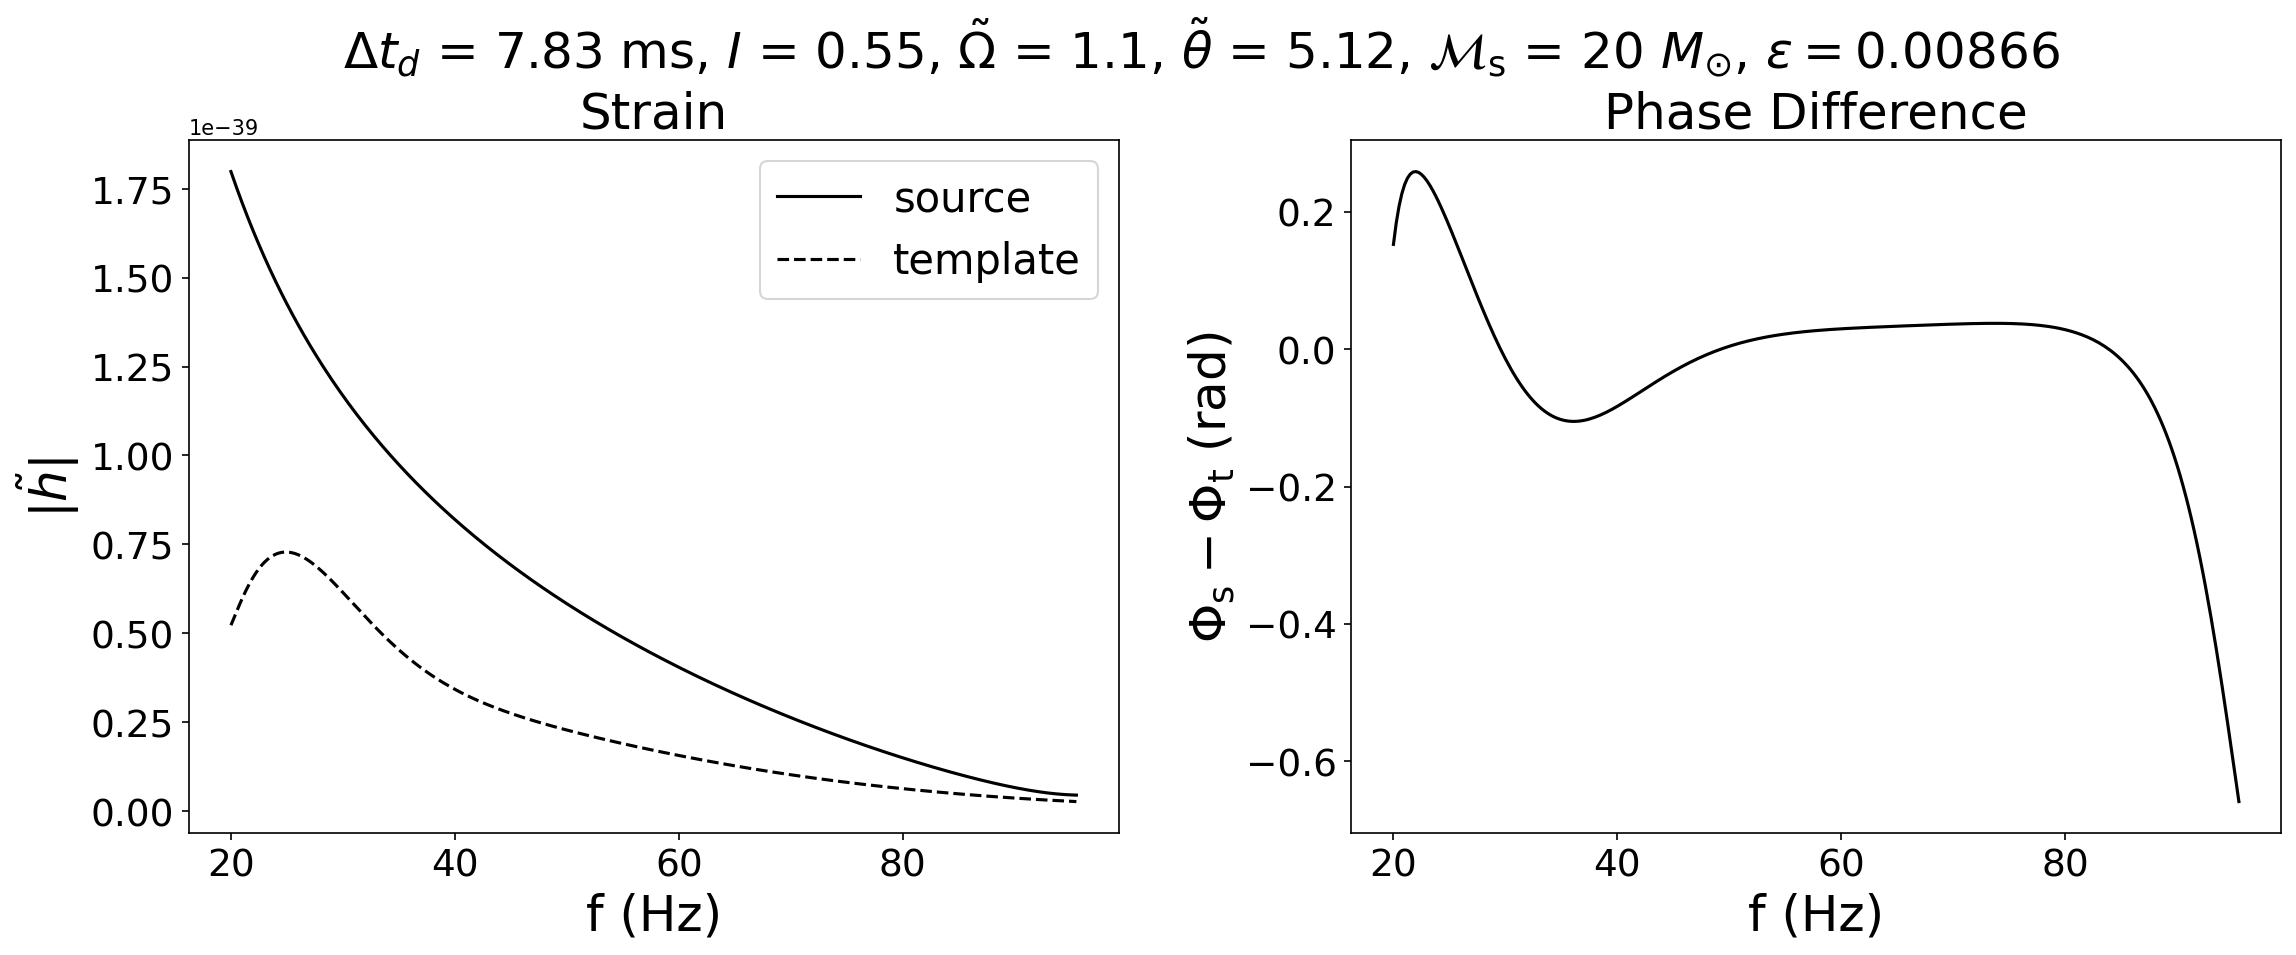

idx = 1.92085e-08, phi = -1.99089e-08, both should be ~0 if get_updated_mismatch_results is True


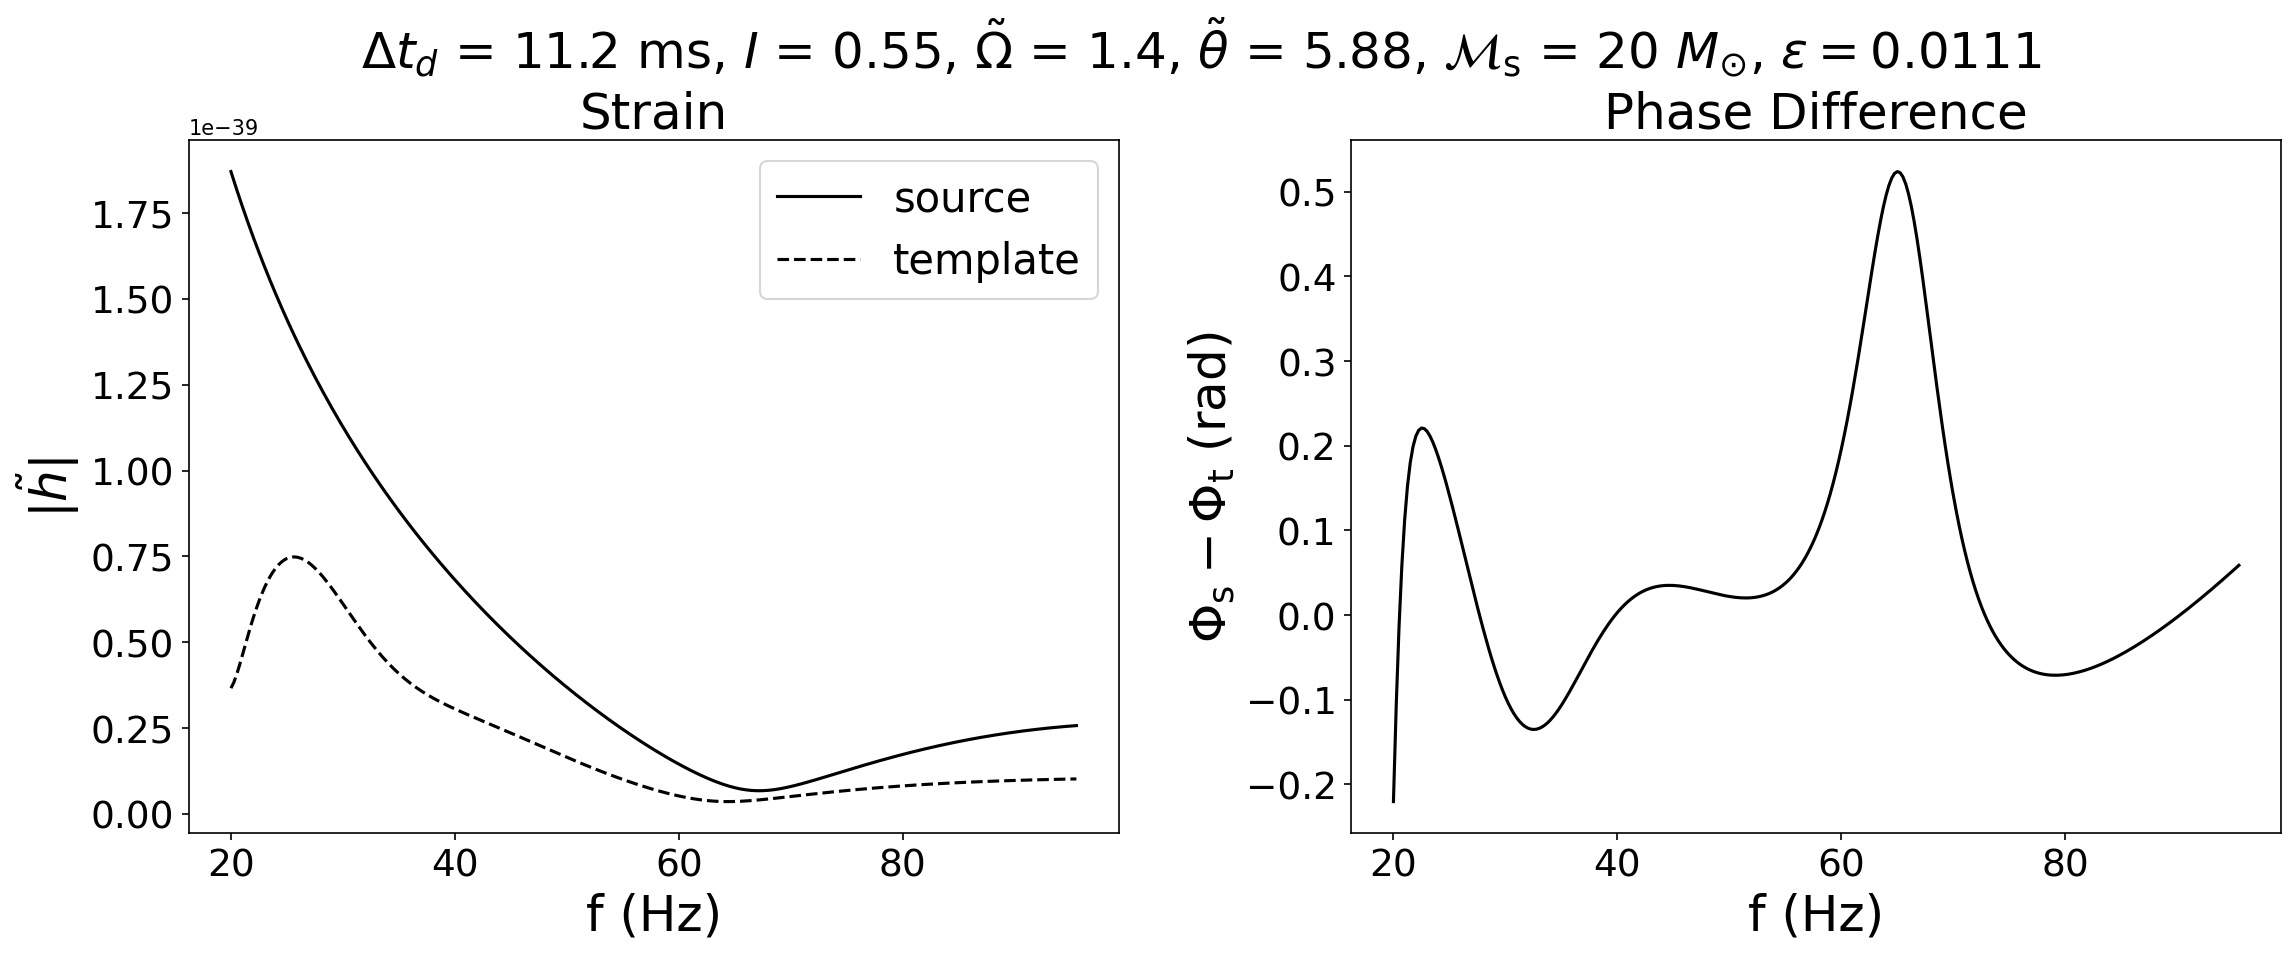

idx = -9.90664e-09, phi = 2.20348e-08, both should be ~0 if get_updated_mismatch_results is True


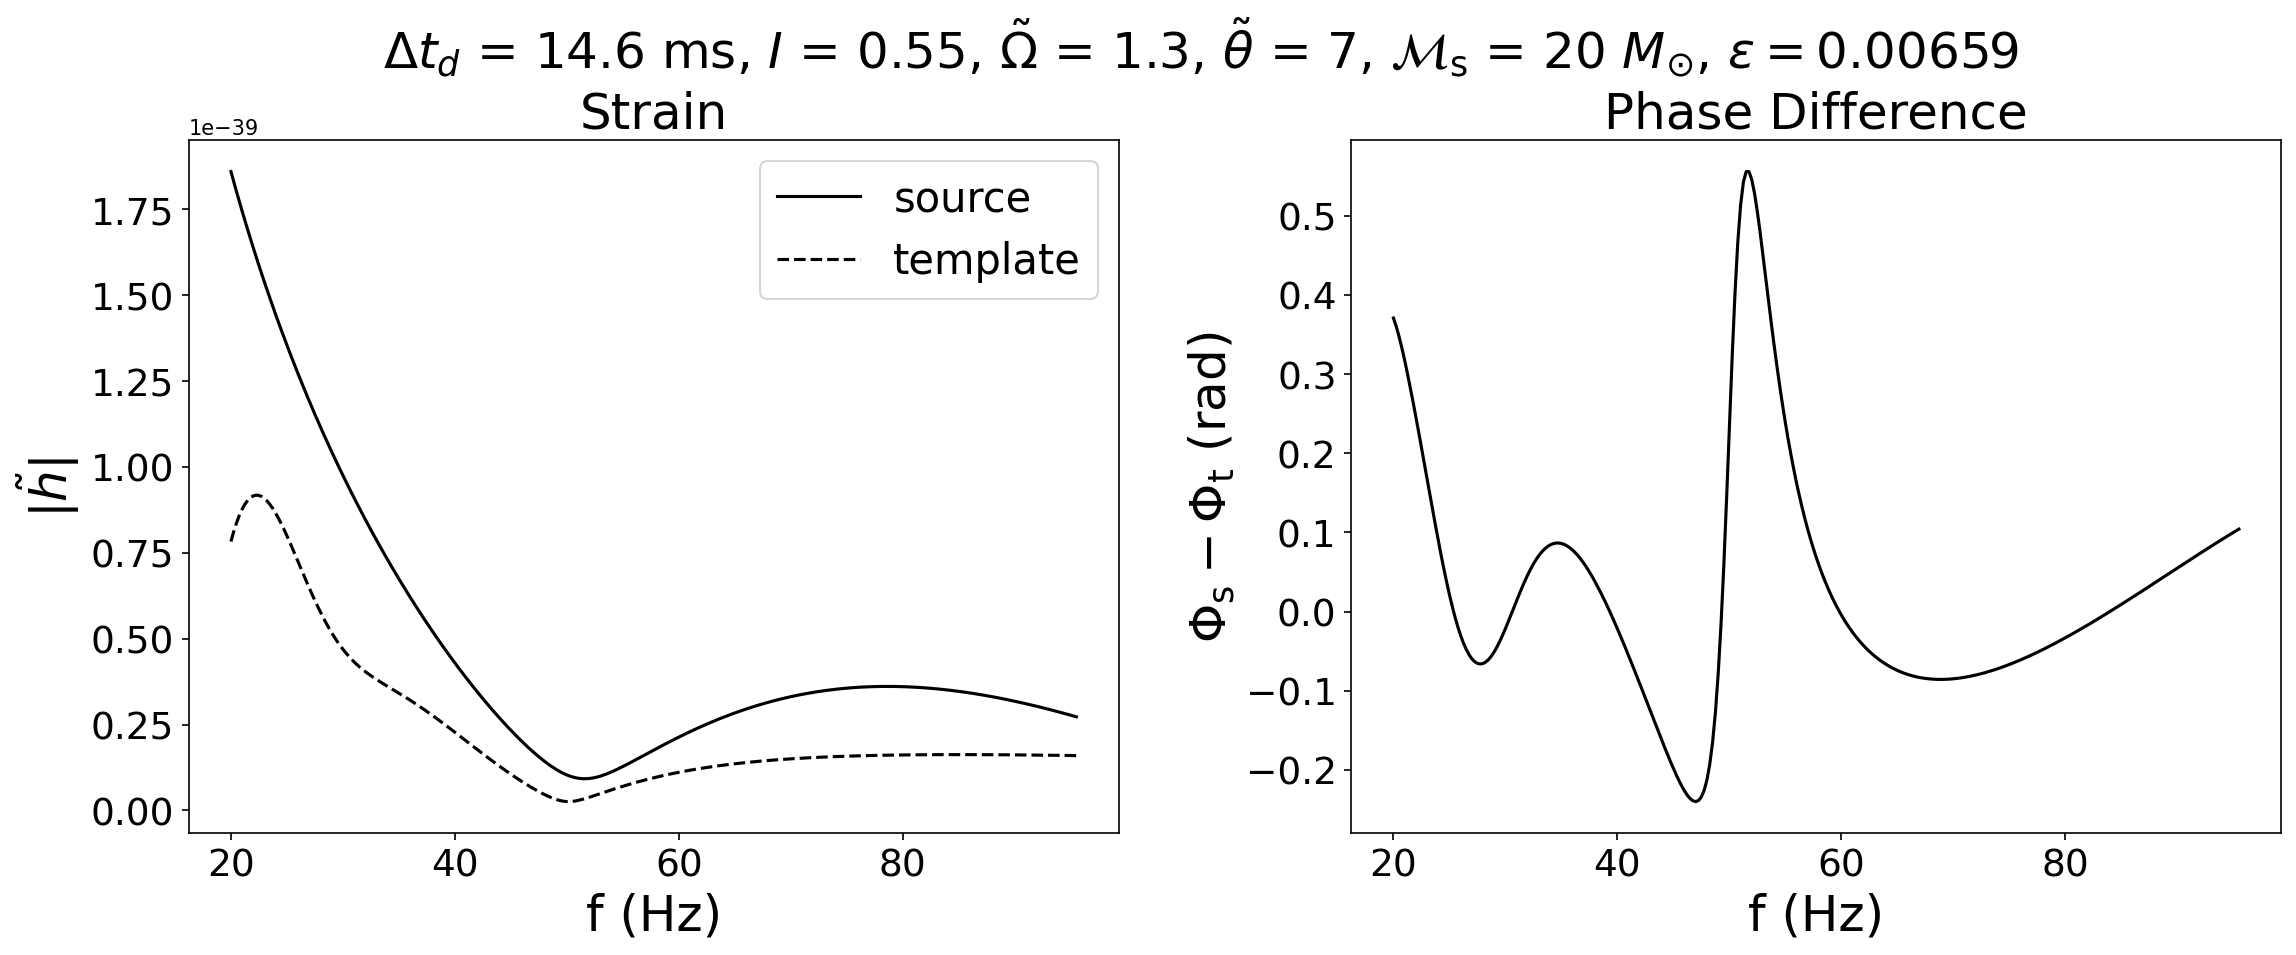

idx = -1.43444e-08, phi = -2.51295e-08, both should be ~0 if get_updated_mismatch_results is True


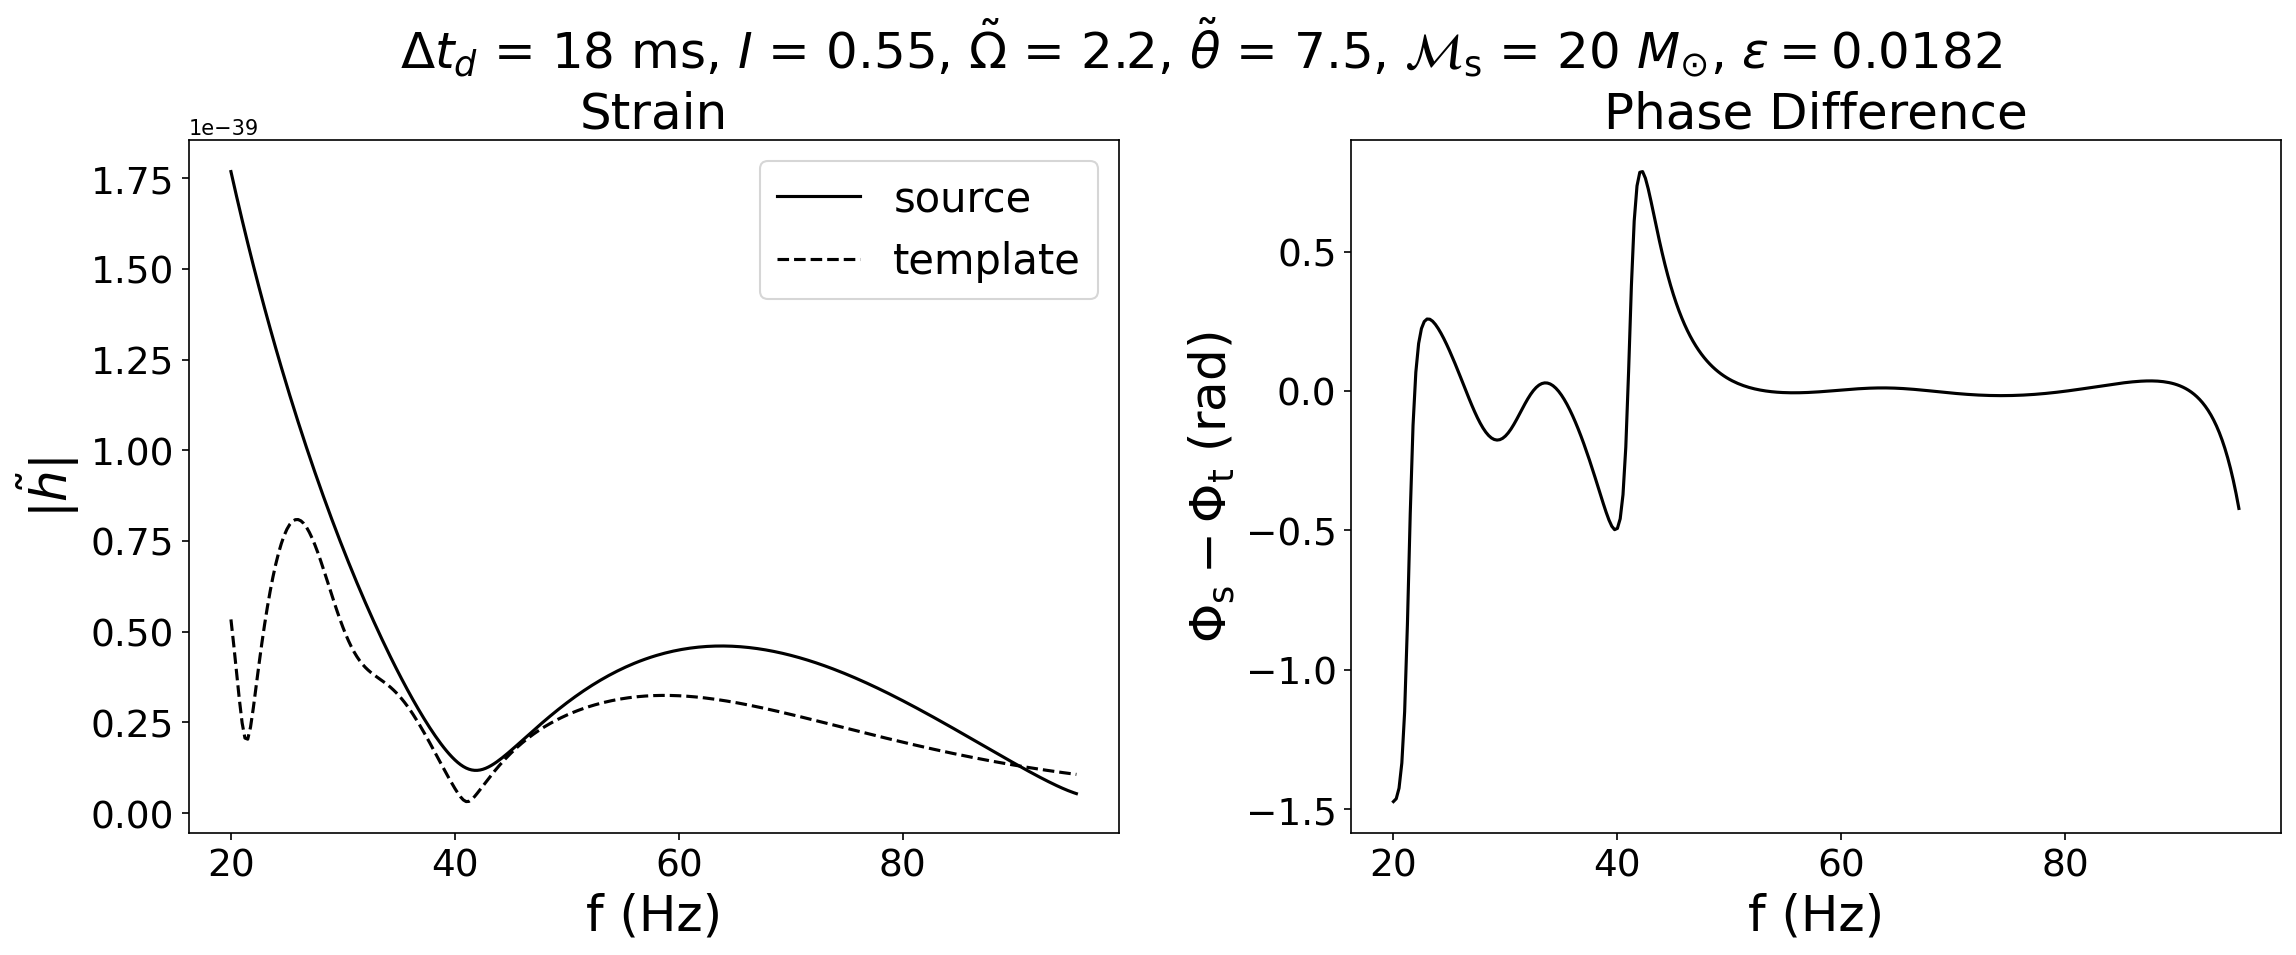

idx = -2.15287e-08, phi = 1.34227e-08, both should be ~0 if get_updated_mismatch_results is True


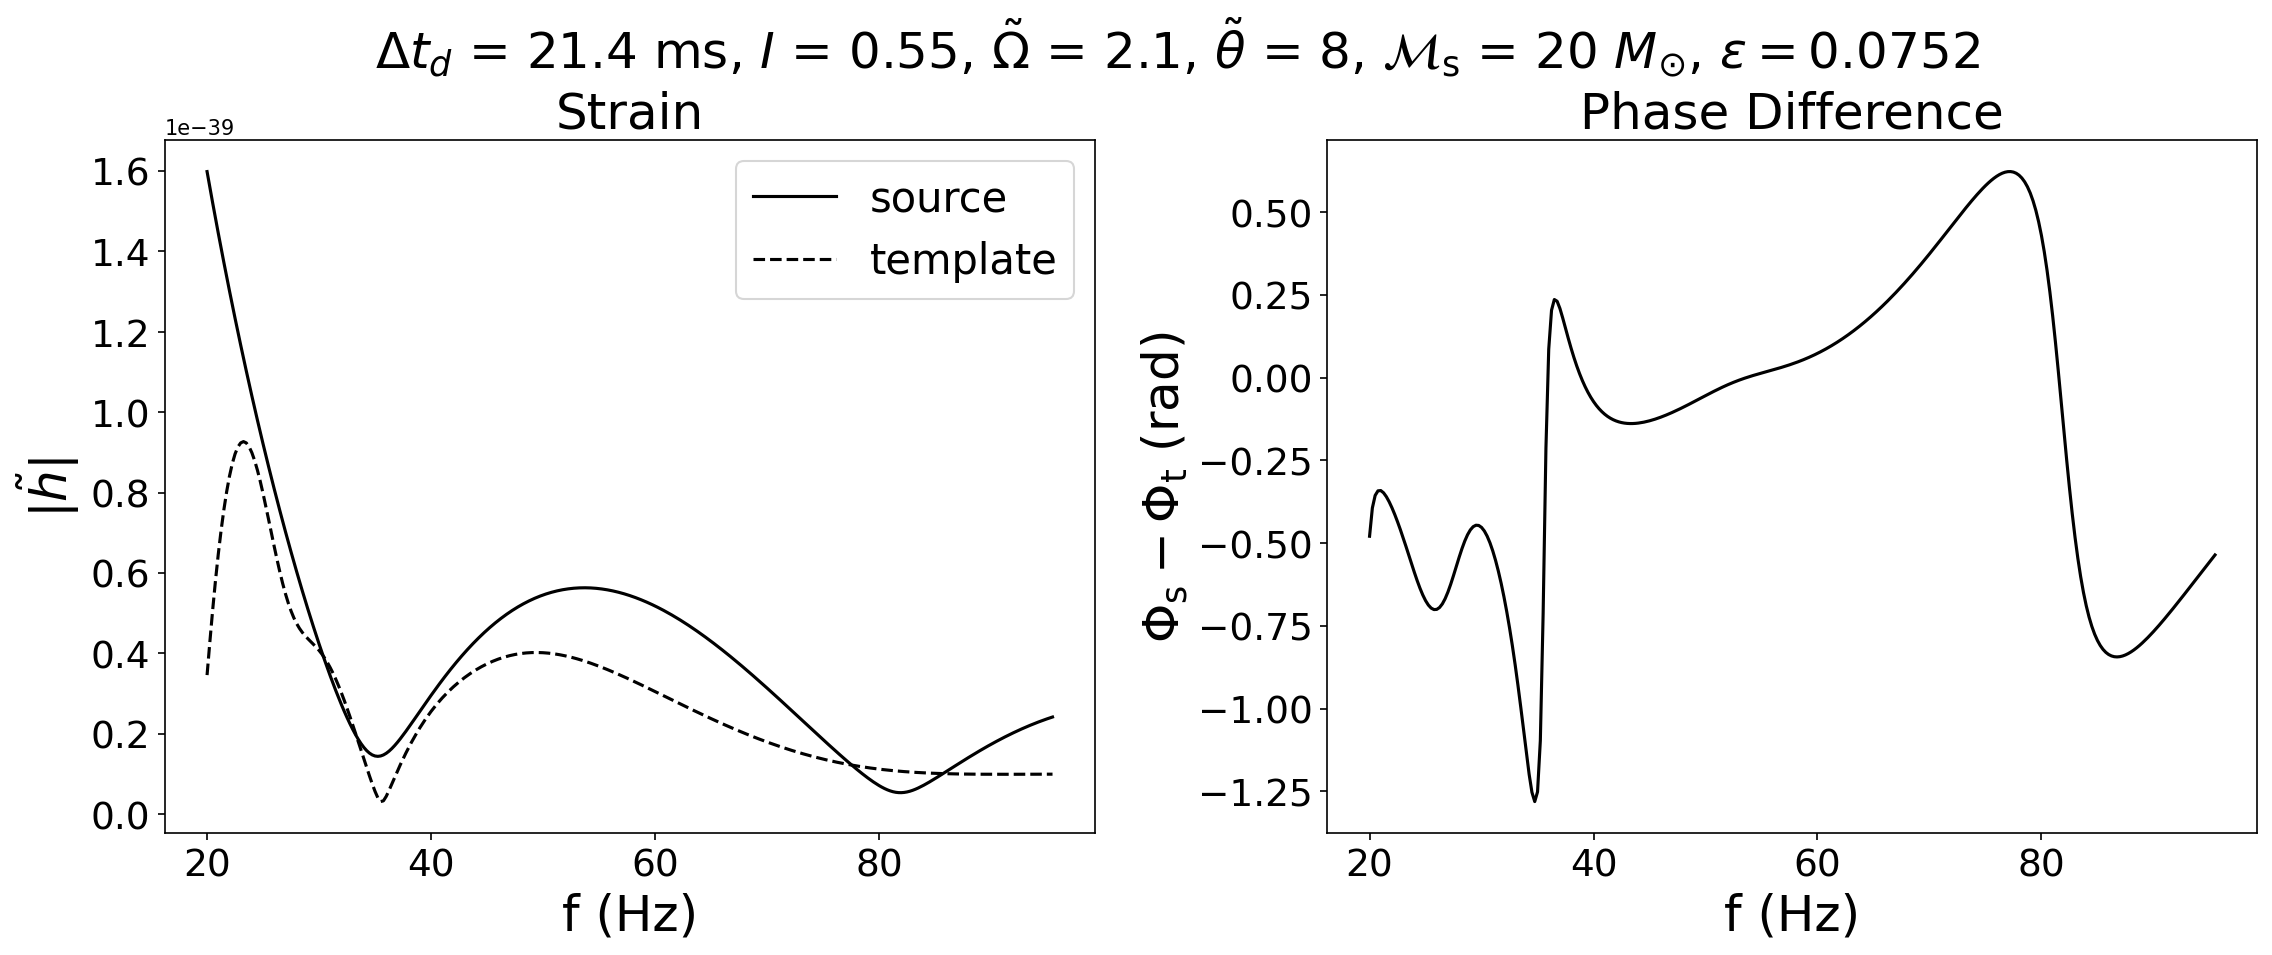

idx = -1.35891e-08, phi = -3.88429e-09, both should be ~0 if get_updated_mismatch_results is True


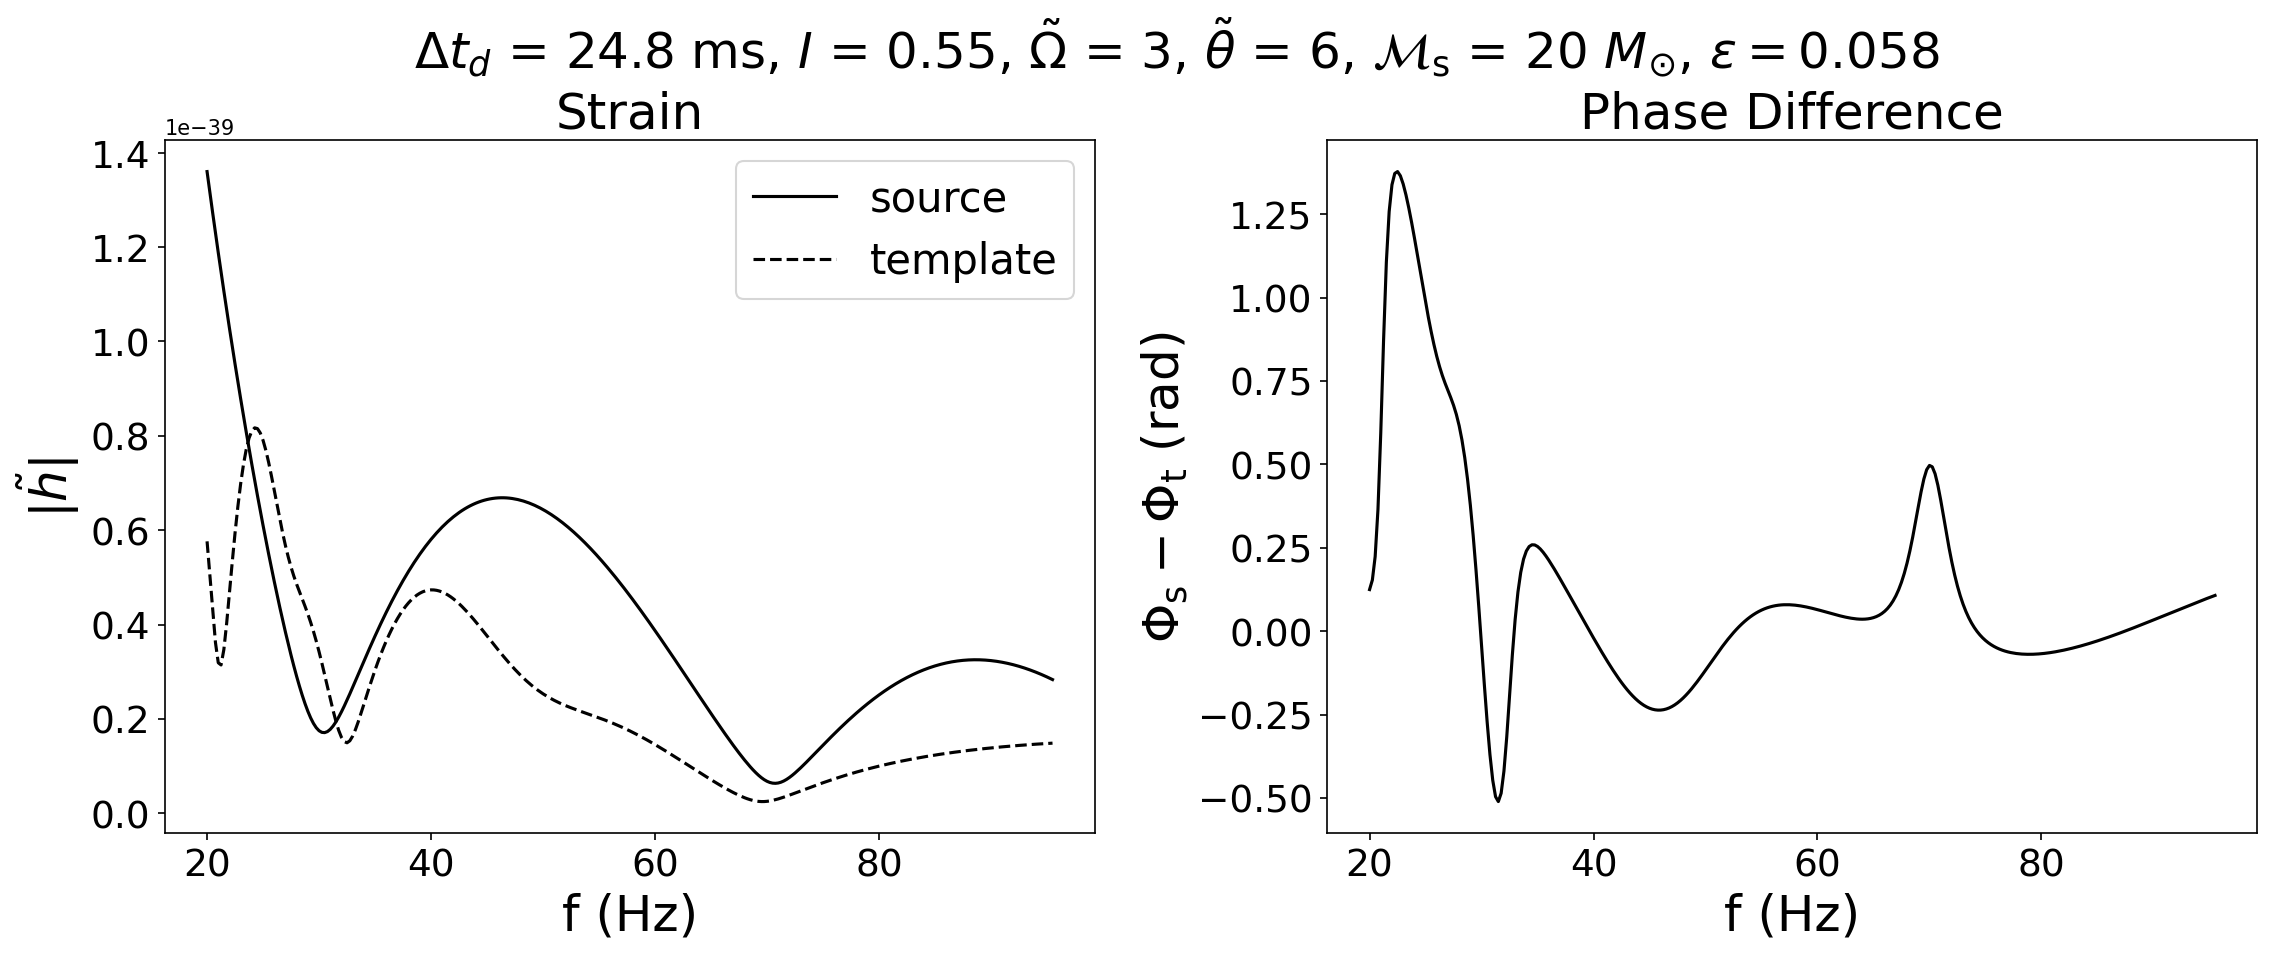

idx = 6.71042e-09, phi = 3.30285e-08, both should be ~0 if get_updated_mismatch_results is True


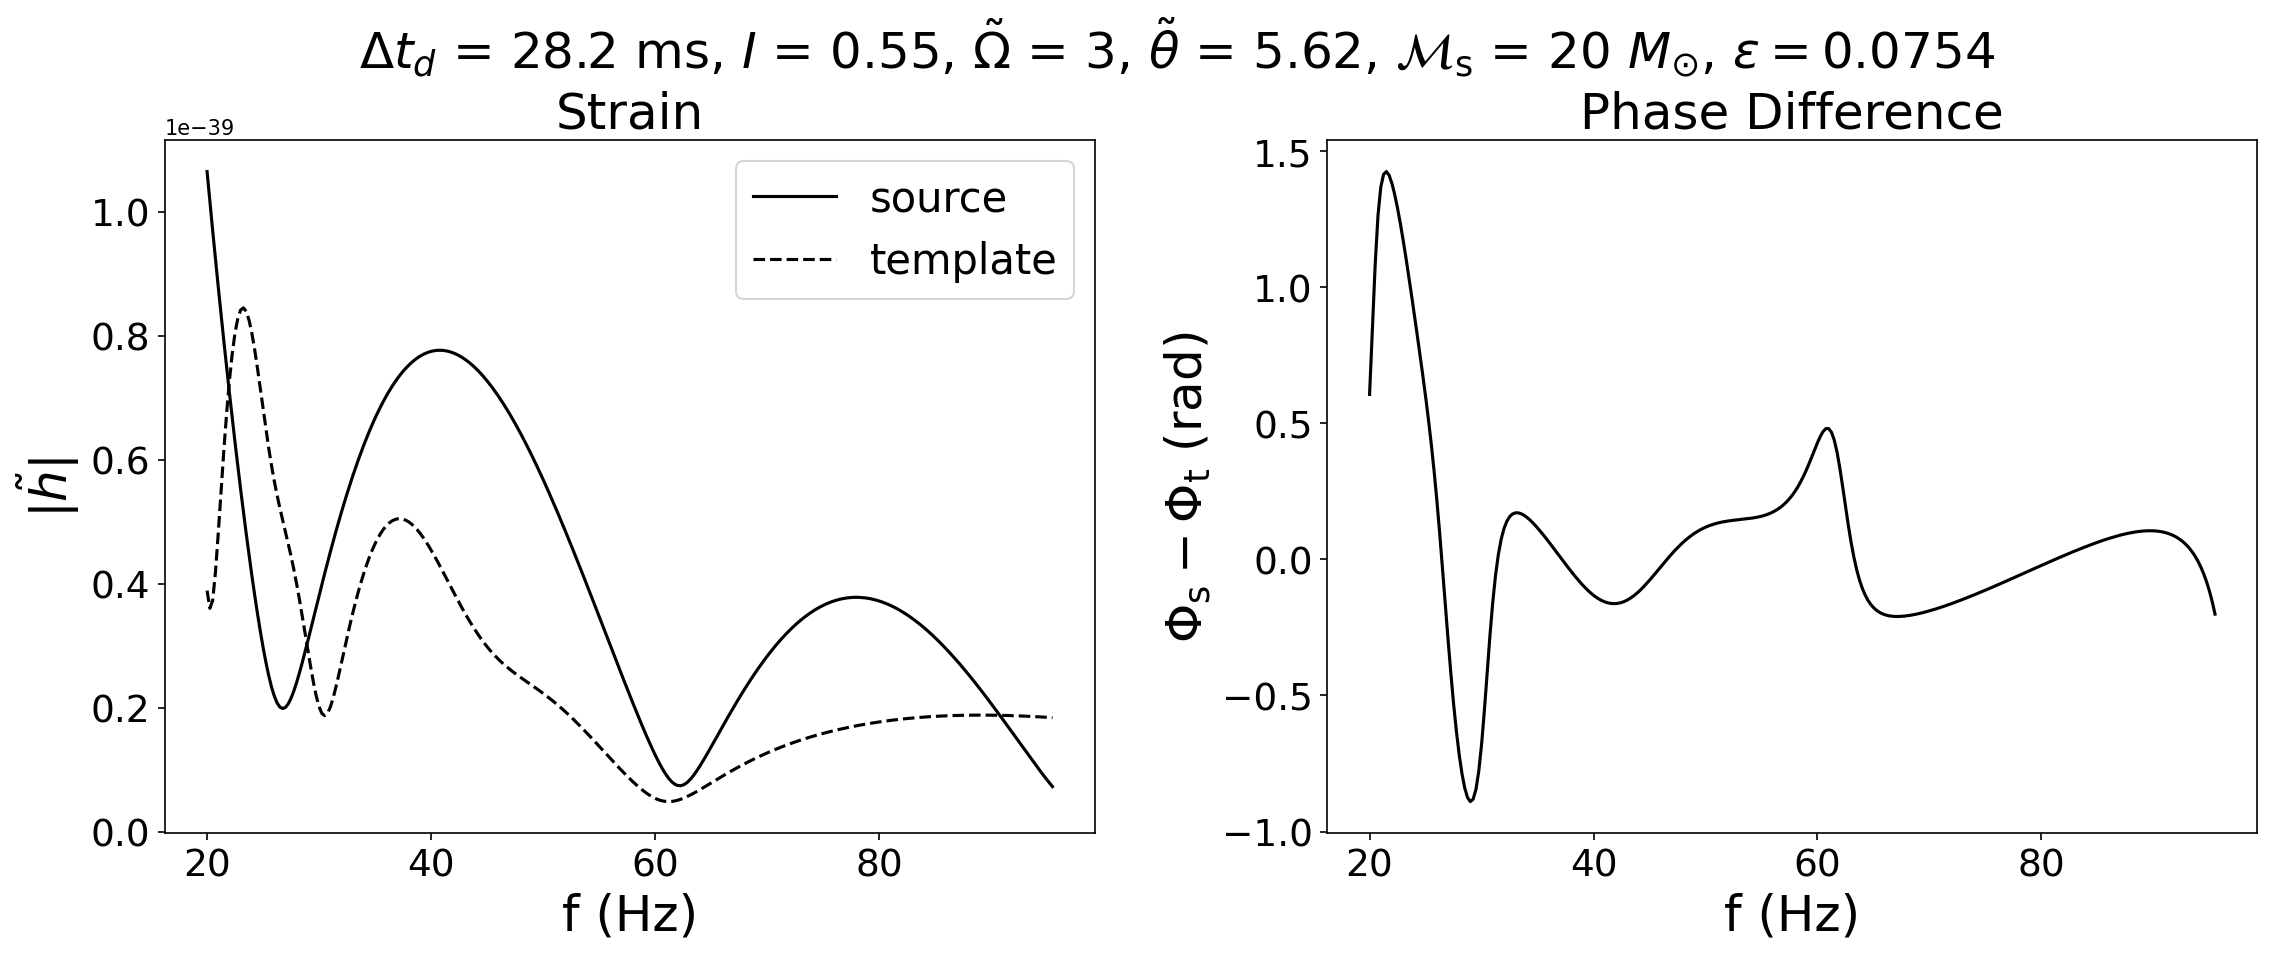

idx = 4.30462e-09, phi = 1.3316e-08, both should be ~0 if get_updated_mismatch_results is True


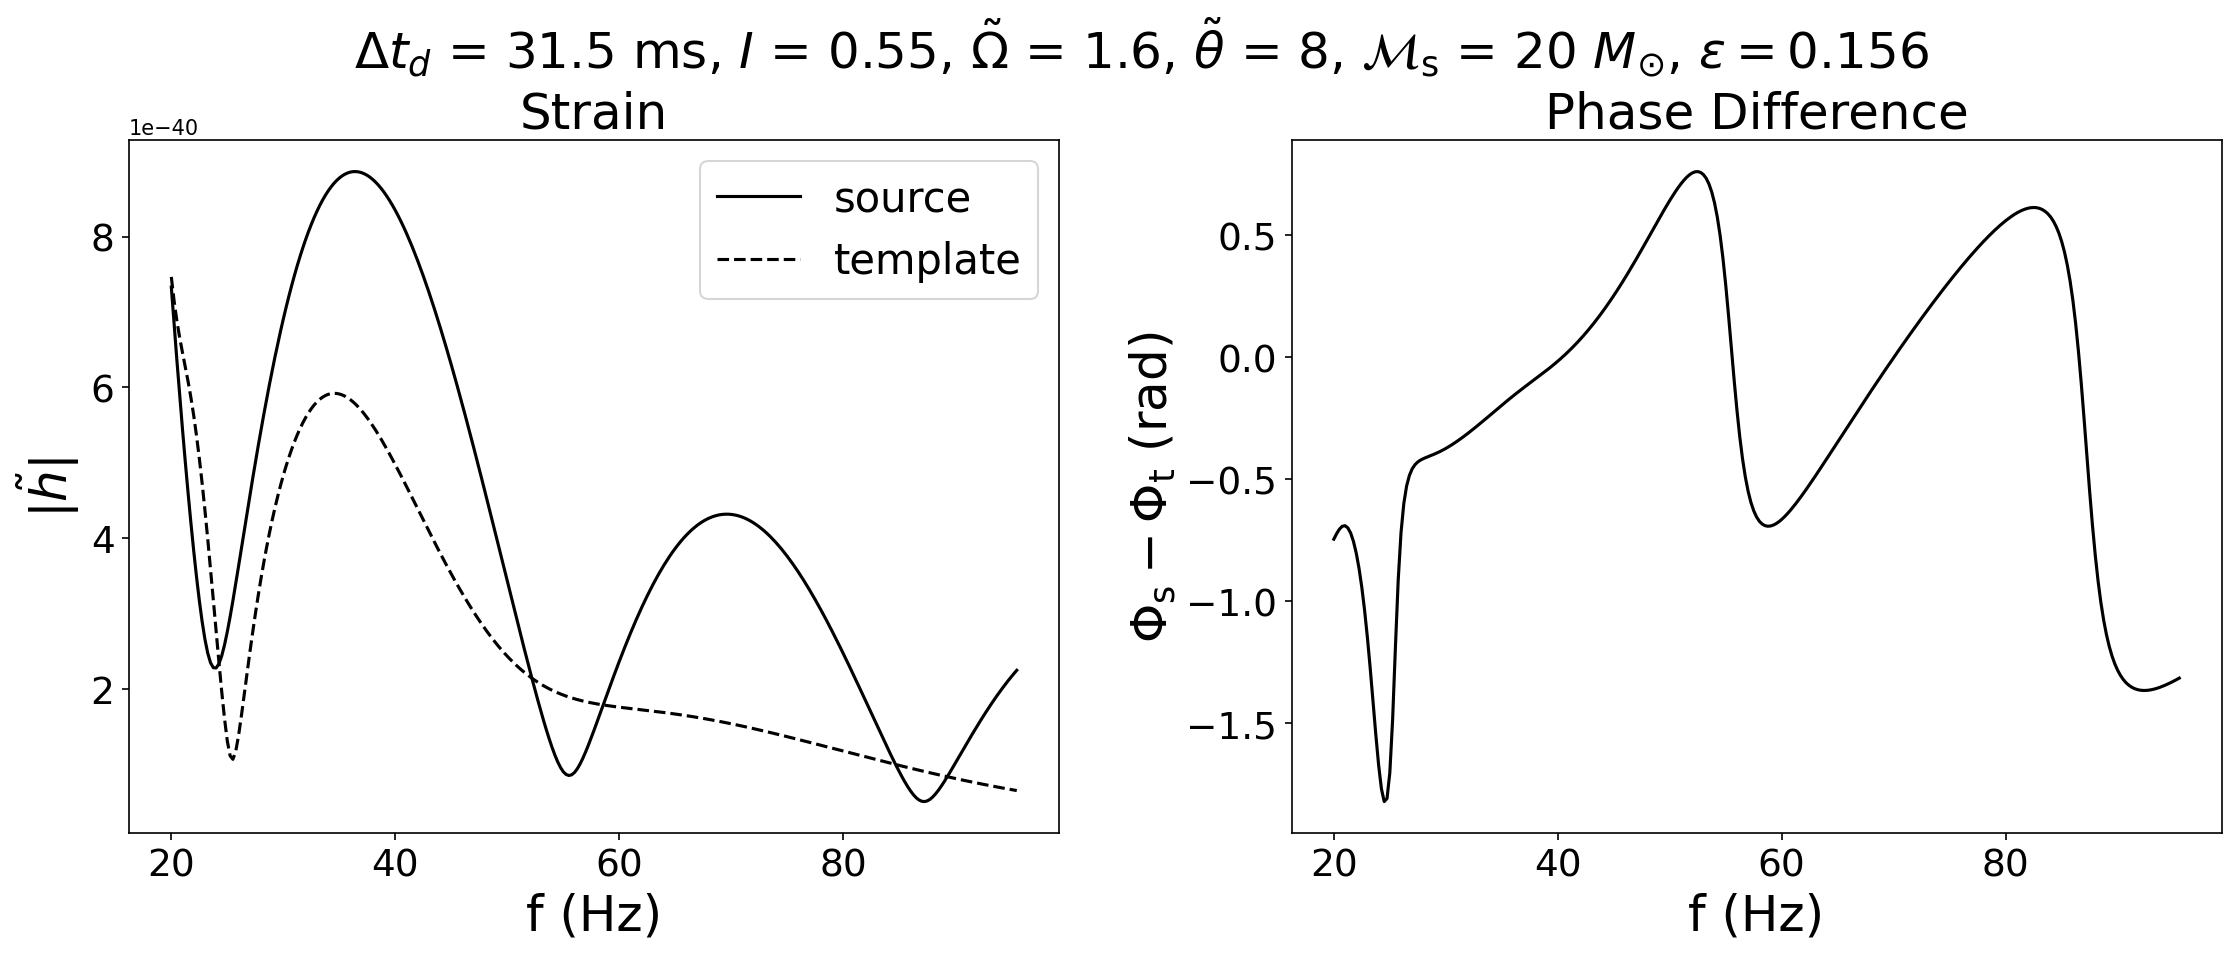

idx = 9.35506e-09, phi = -1.10495e-08, both should be ~0 if get_updated_mismatch_results is True


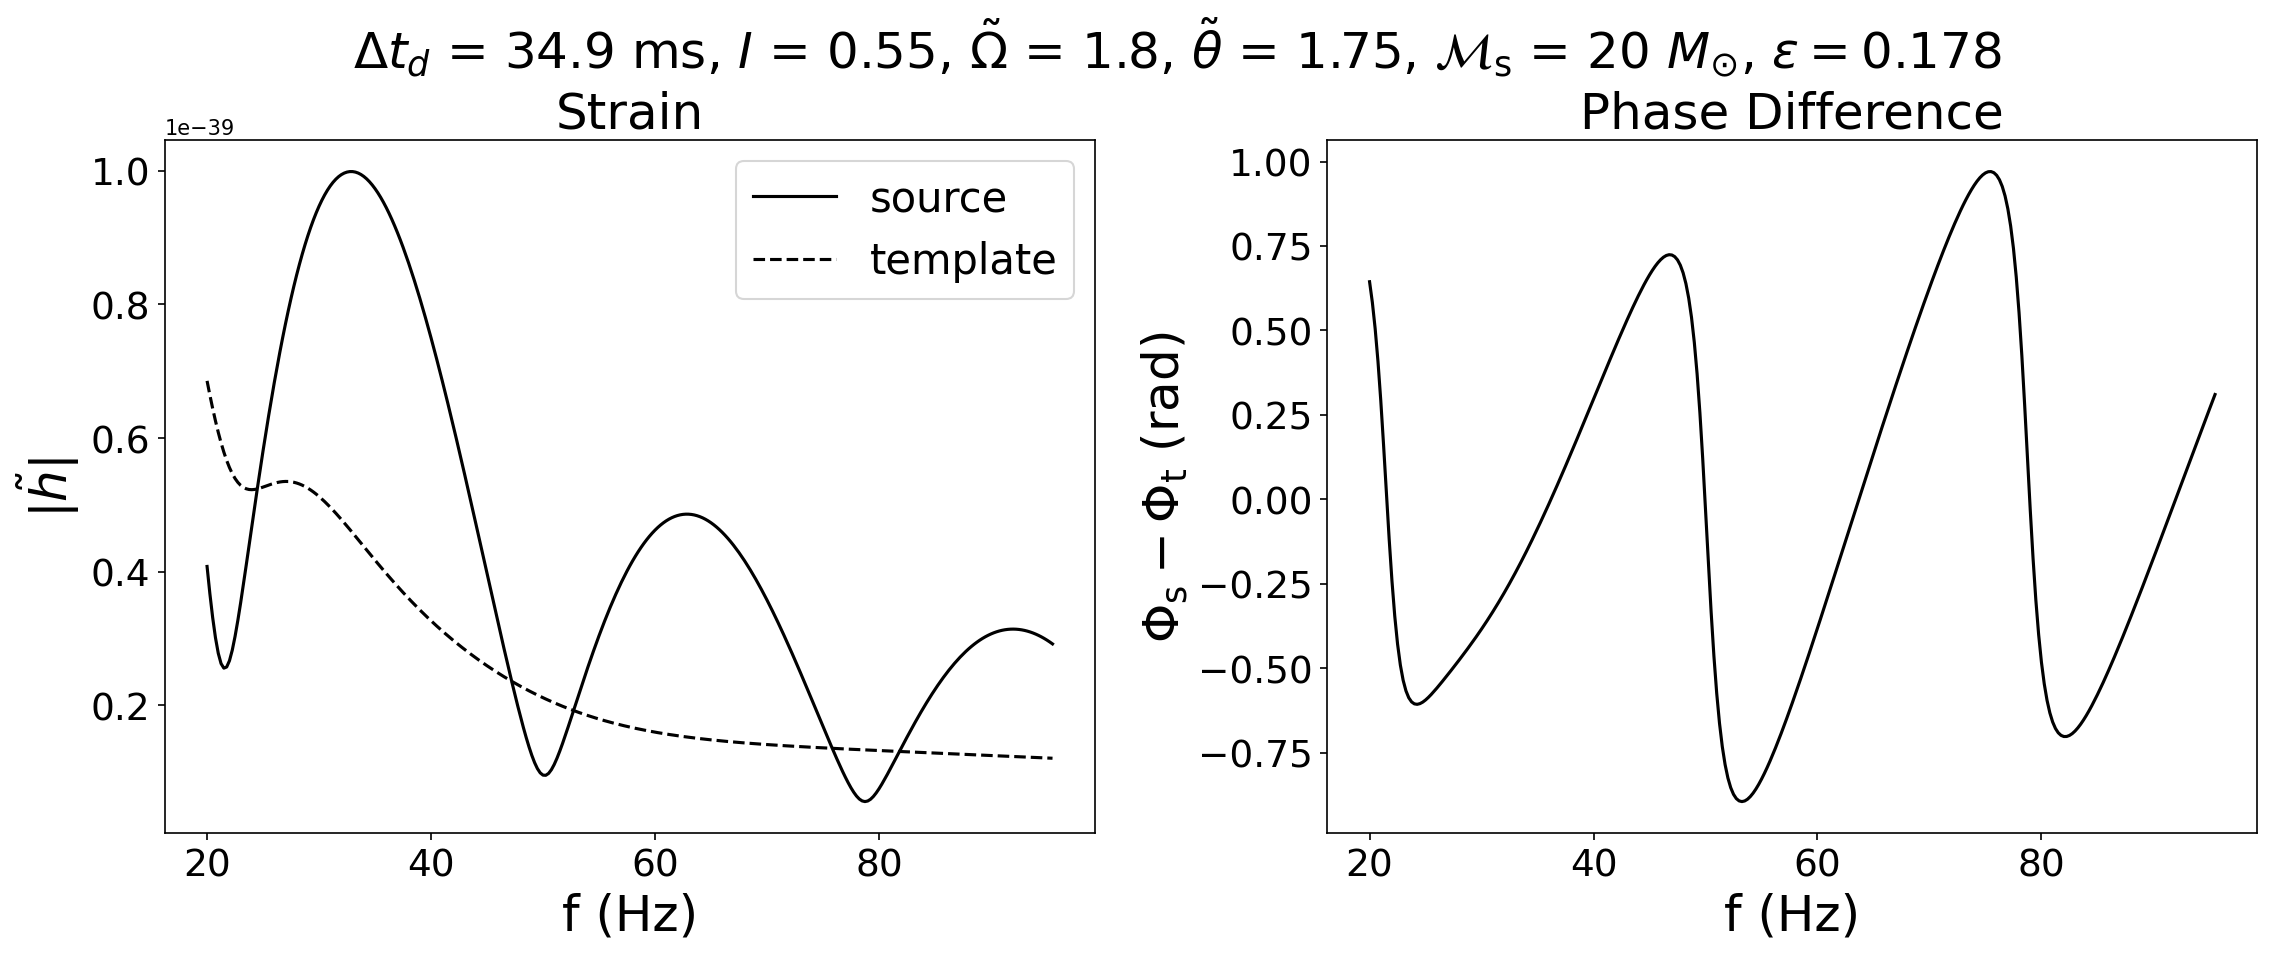

idx = -4.59336e-10, phi = 2.36804e-08, both should be ~0 if get_updated_mismatch_results is True


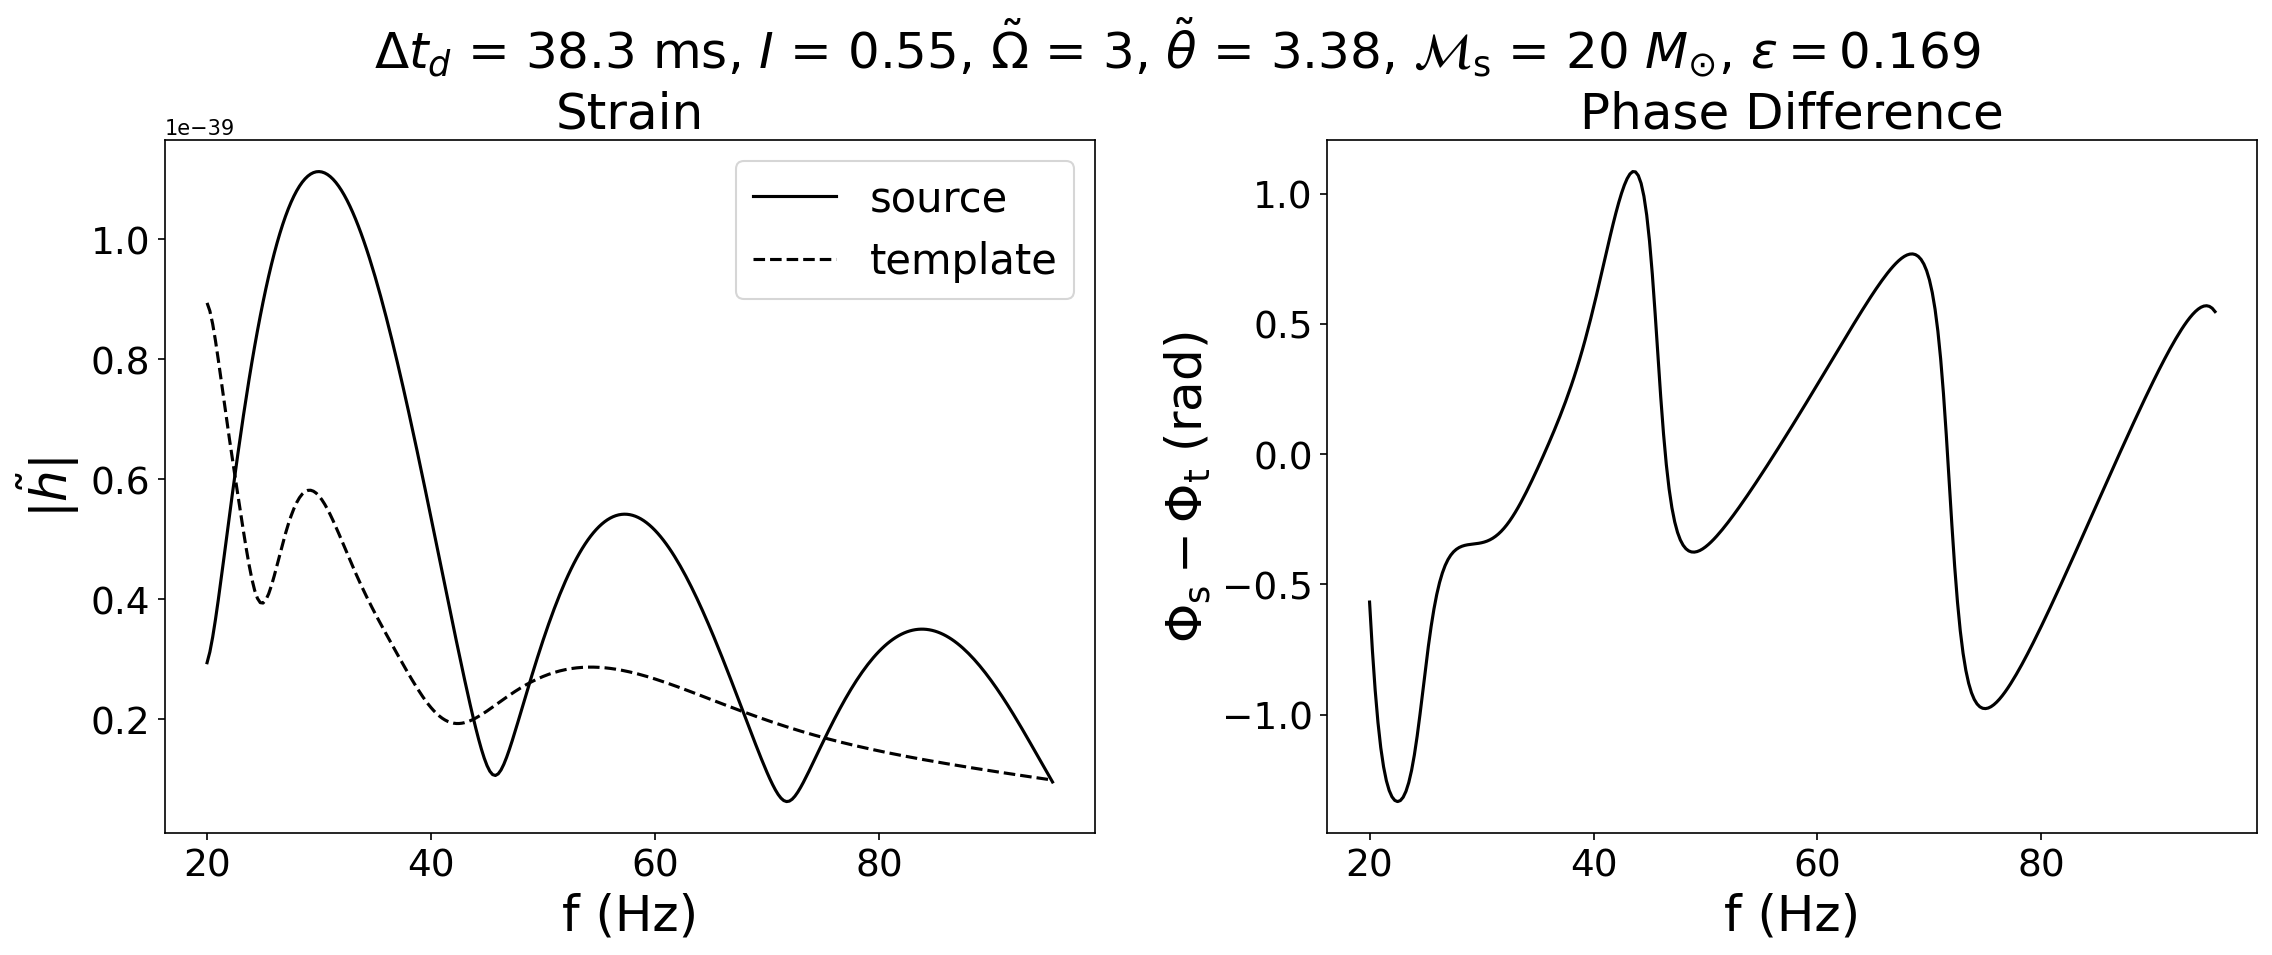

In [19]:
lens_params_2 = data_td["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

MLz_arr = data_td["MLz_arr"]
td_arr = data_td["td_arr"]

for i in range(0, len(MLz_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_td[td_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_td[td_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()

idx = -4.97824e-09, phi = -1.05571e-08, both should be ~0 if get_updated_mismatch_results is True


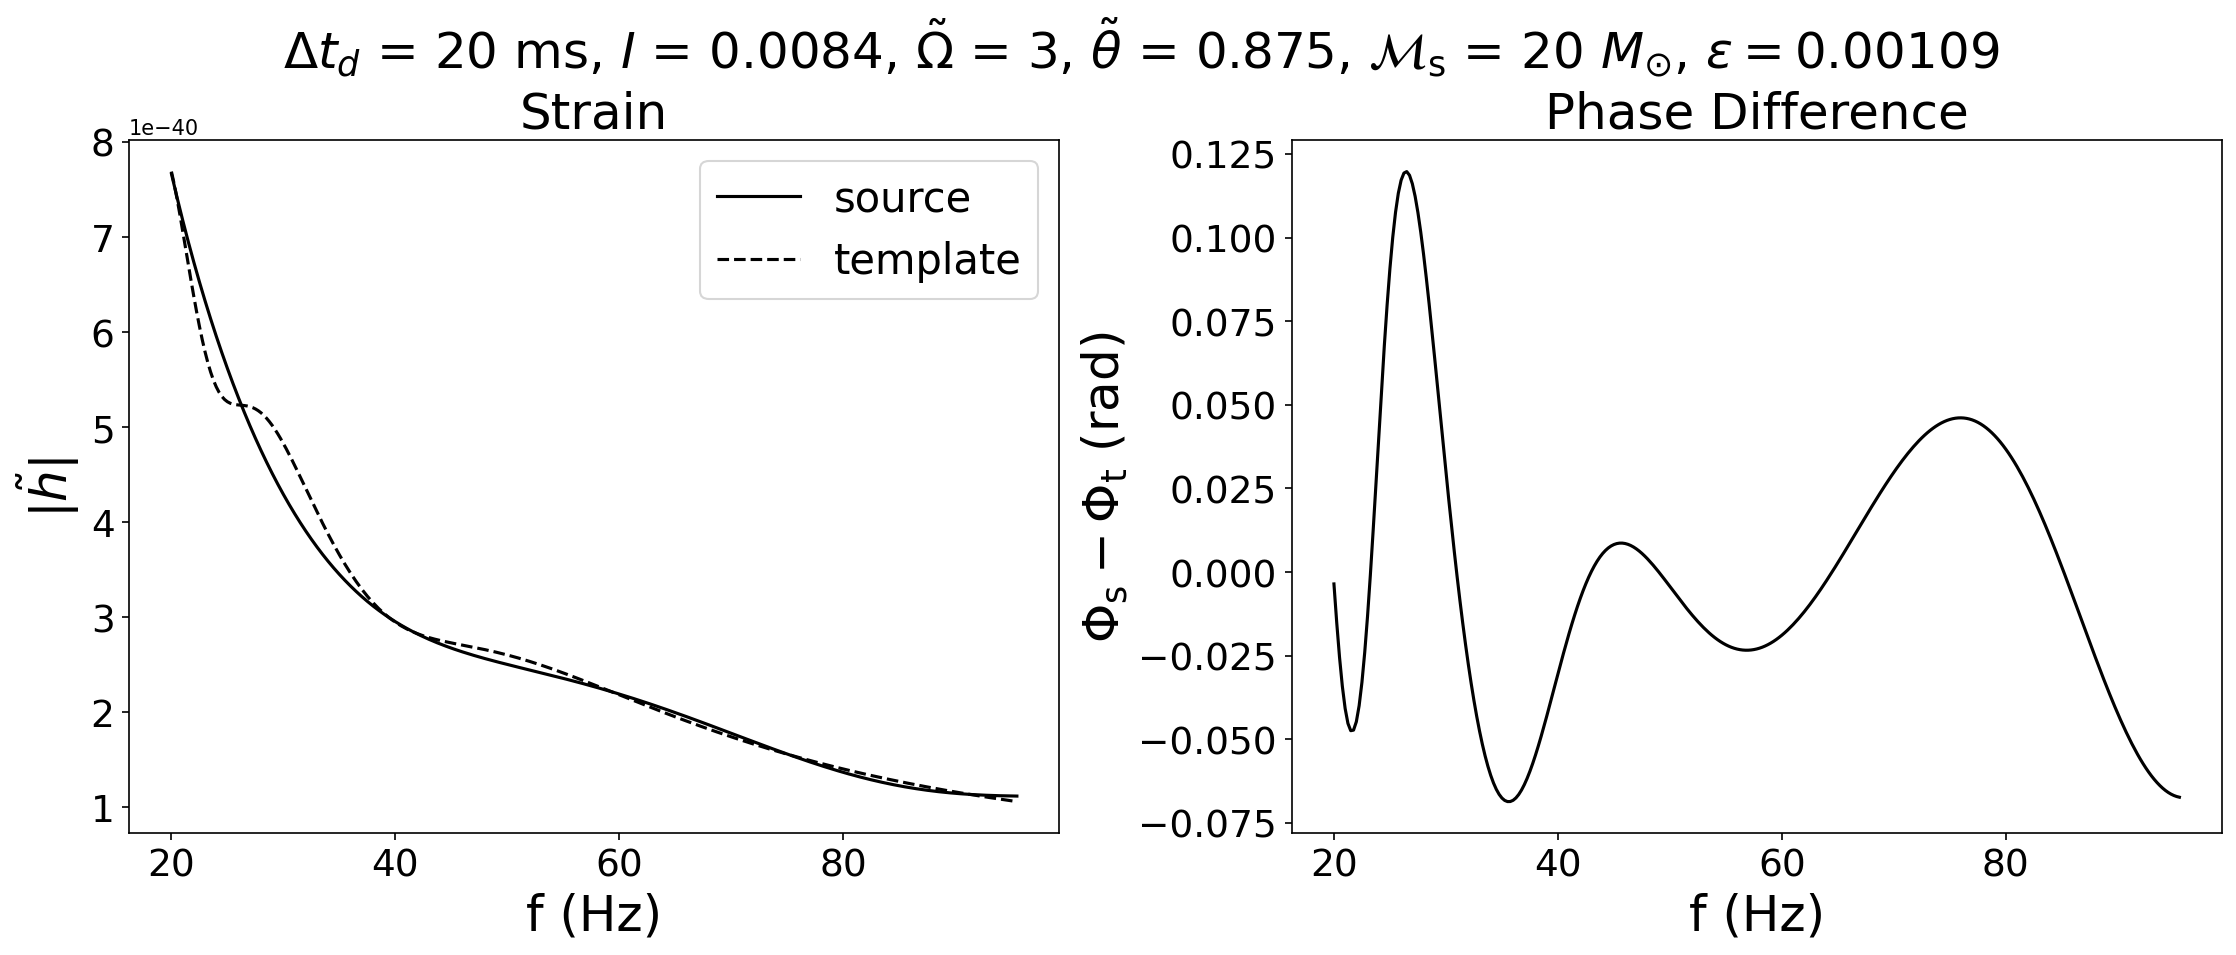

idx = -2.23971e-09, phi = -2.69582e-09, both should be ~0 if get_updated_mismatch_results is True


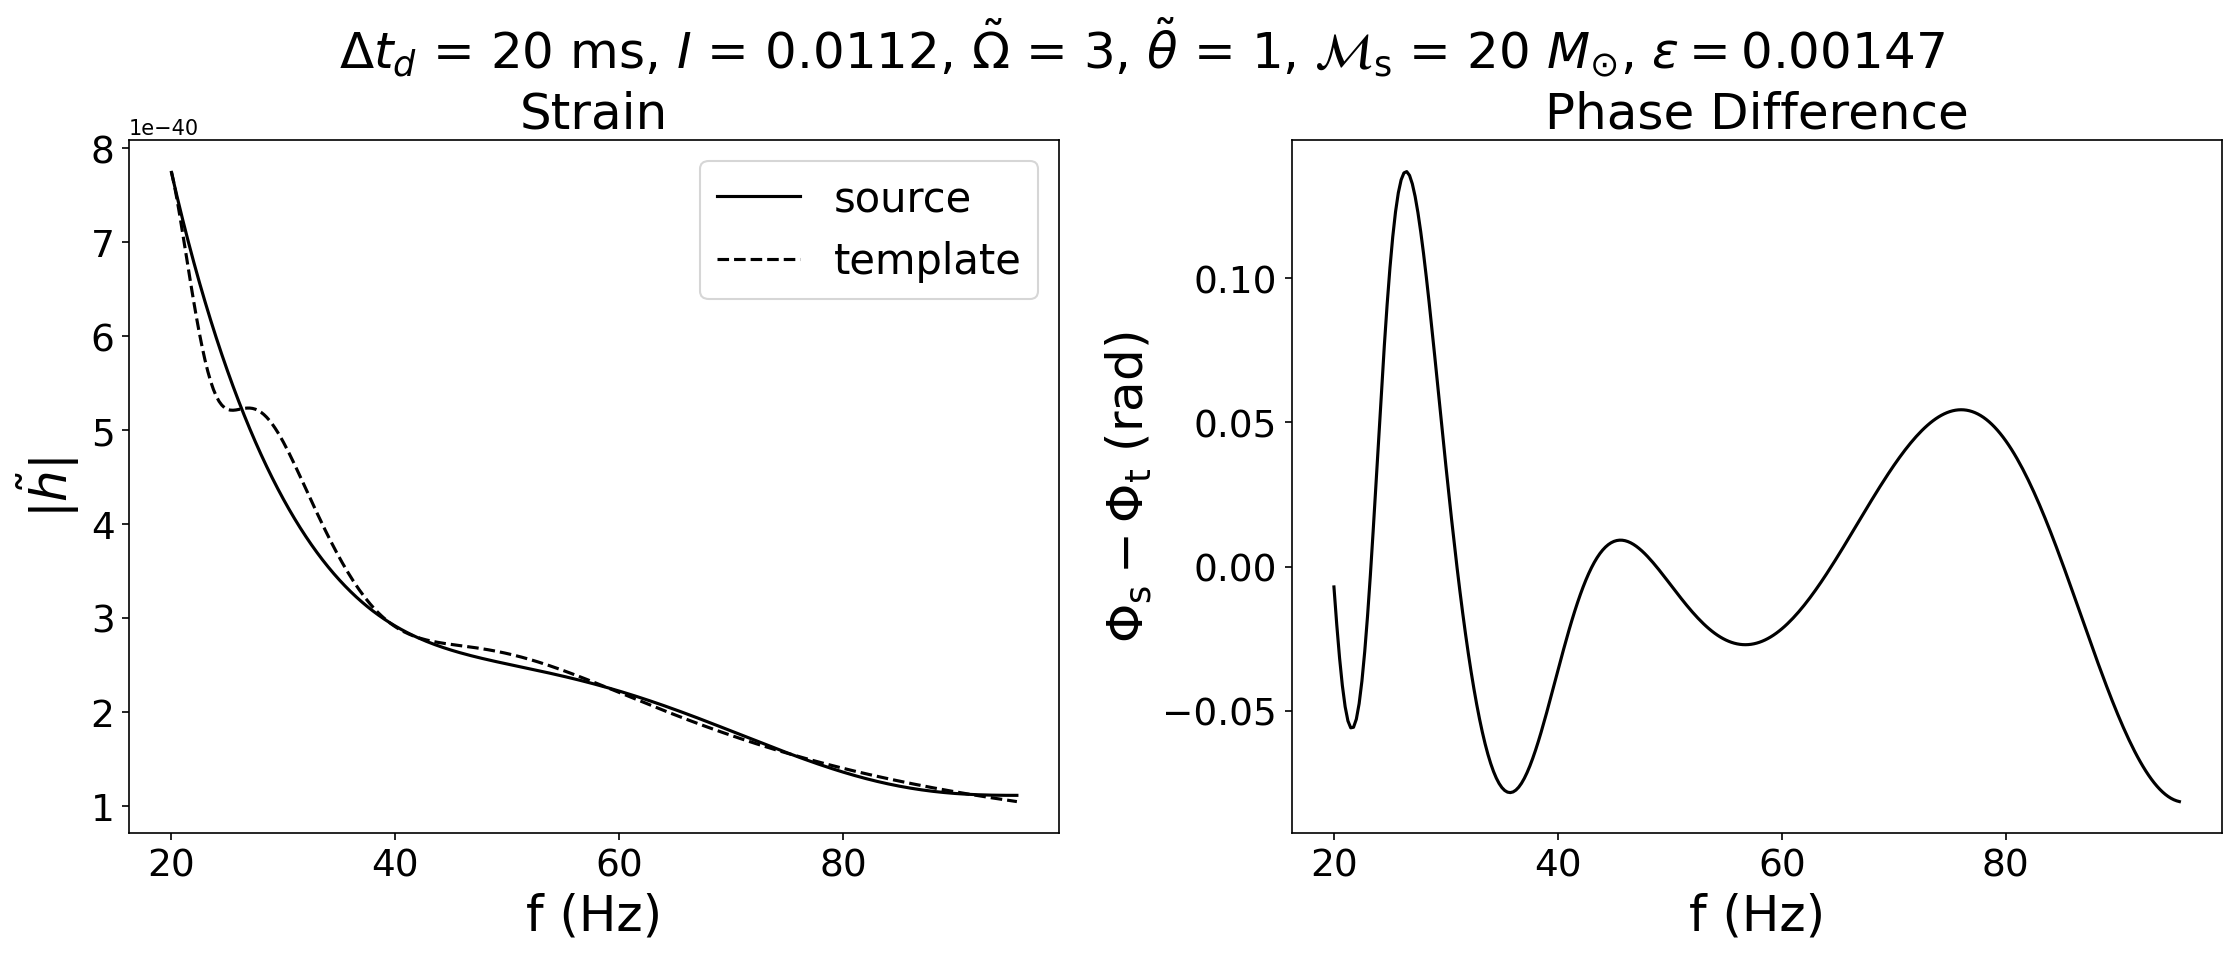

idx = -4.46799e-09, phi = 2.95186e-09, both should be ~0 if get_updated_mismatch_results is True


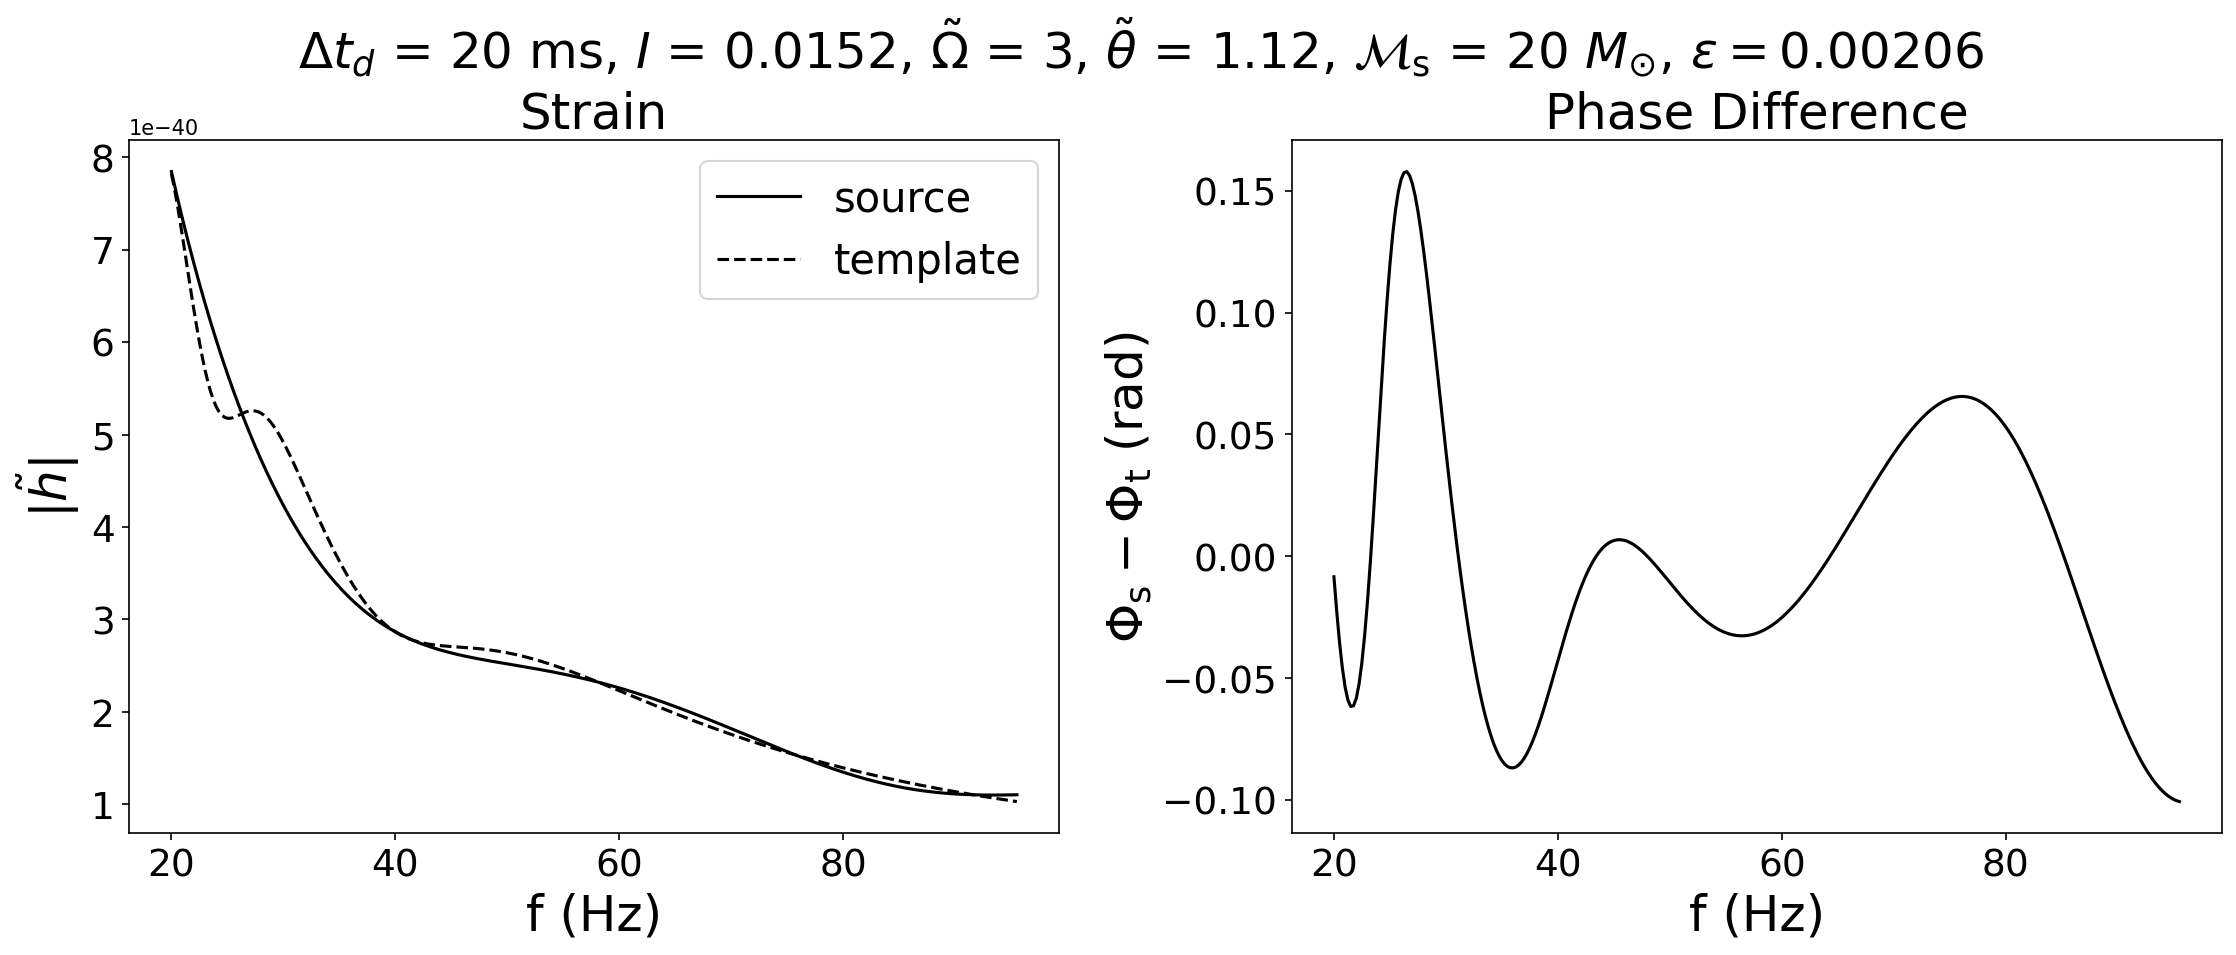

idx = -2.67389e-08, phi = 4.55914e-09, both should be ~0 if get_updated_mismatch_results is True


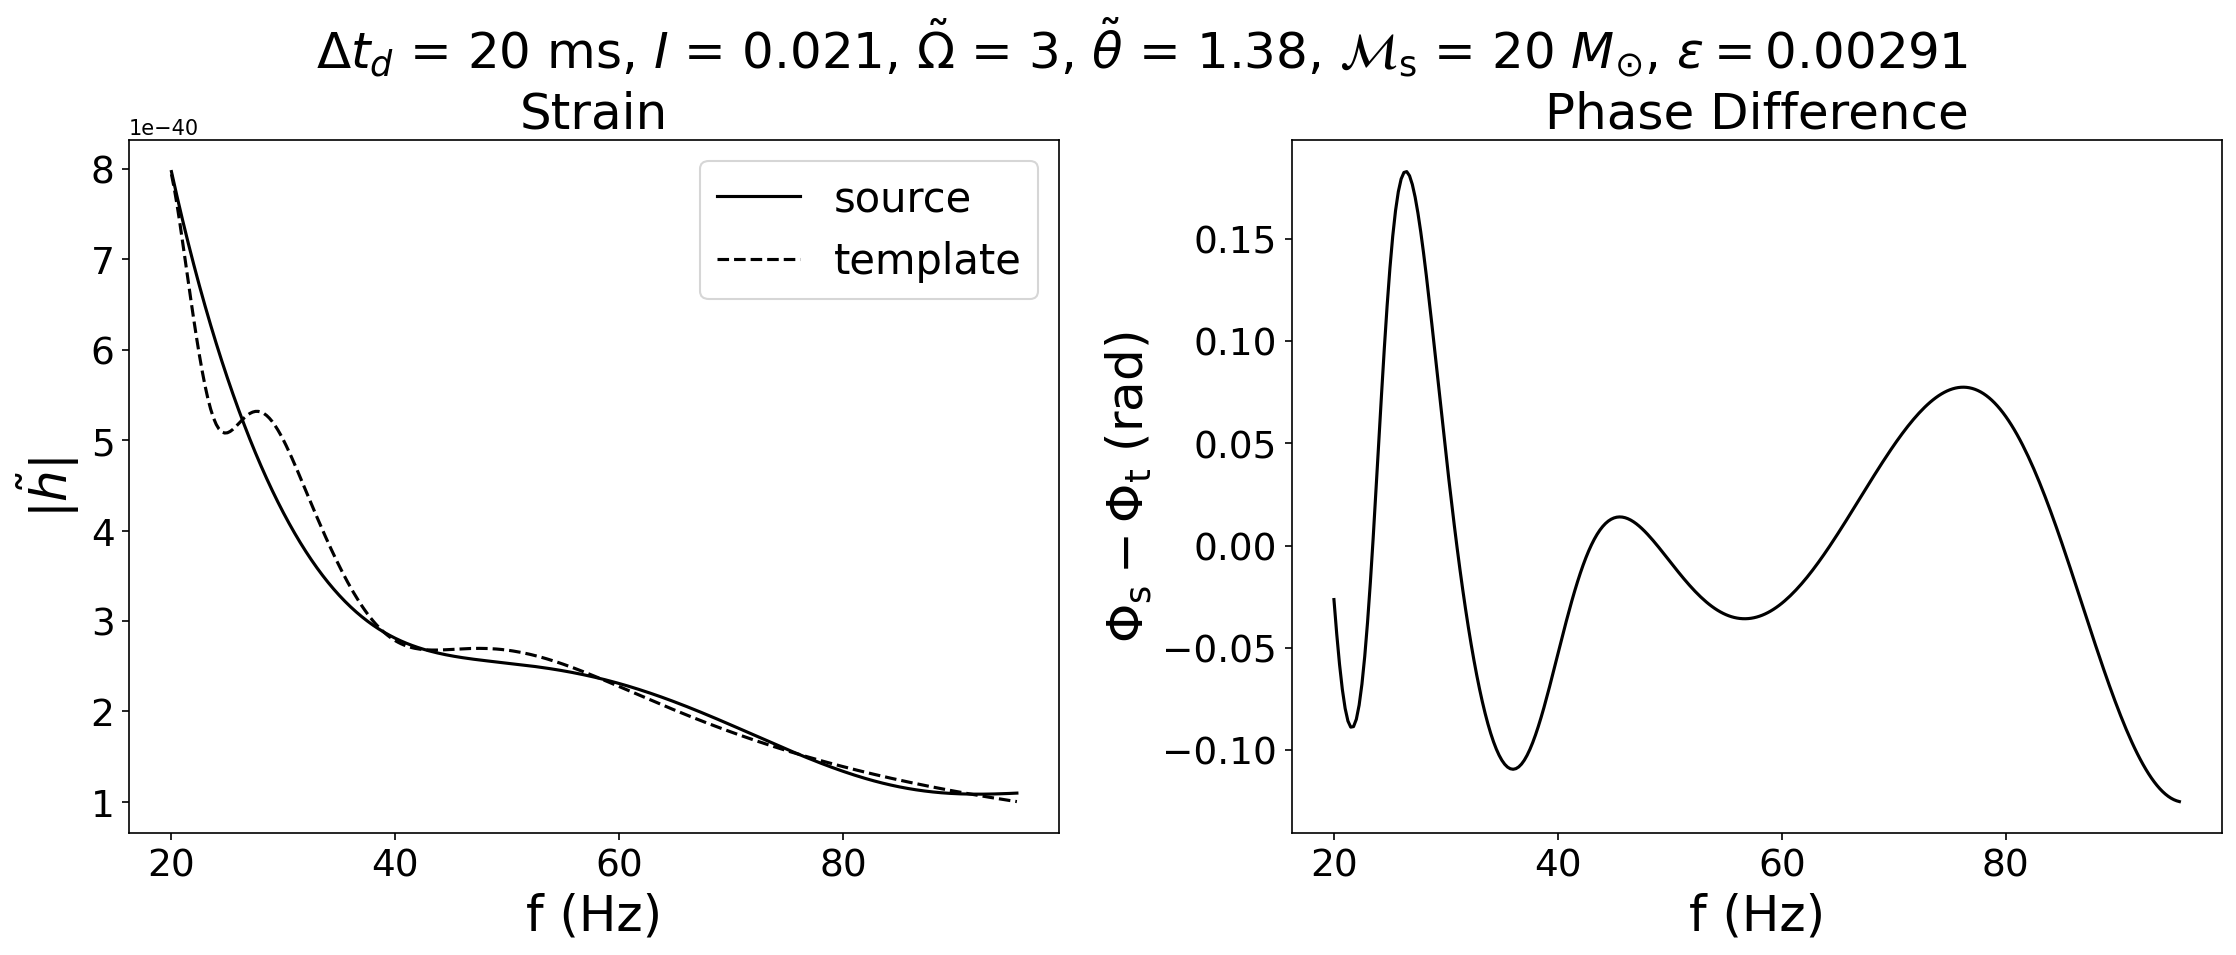

idx = 3.14796e-09, phi = 2.73491e-09, both should be ~0 if get_updated_mismatch_results is True


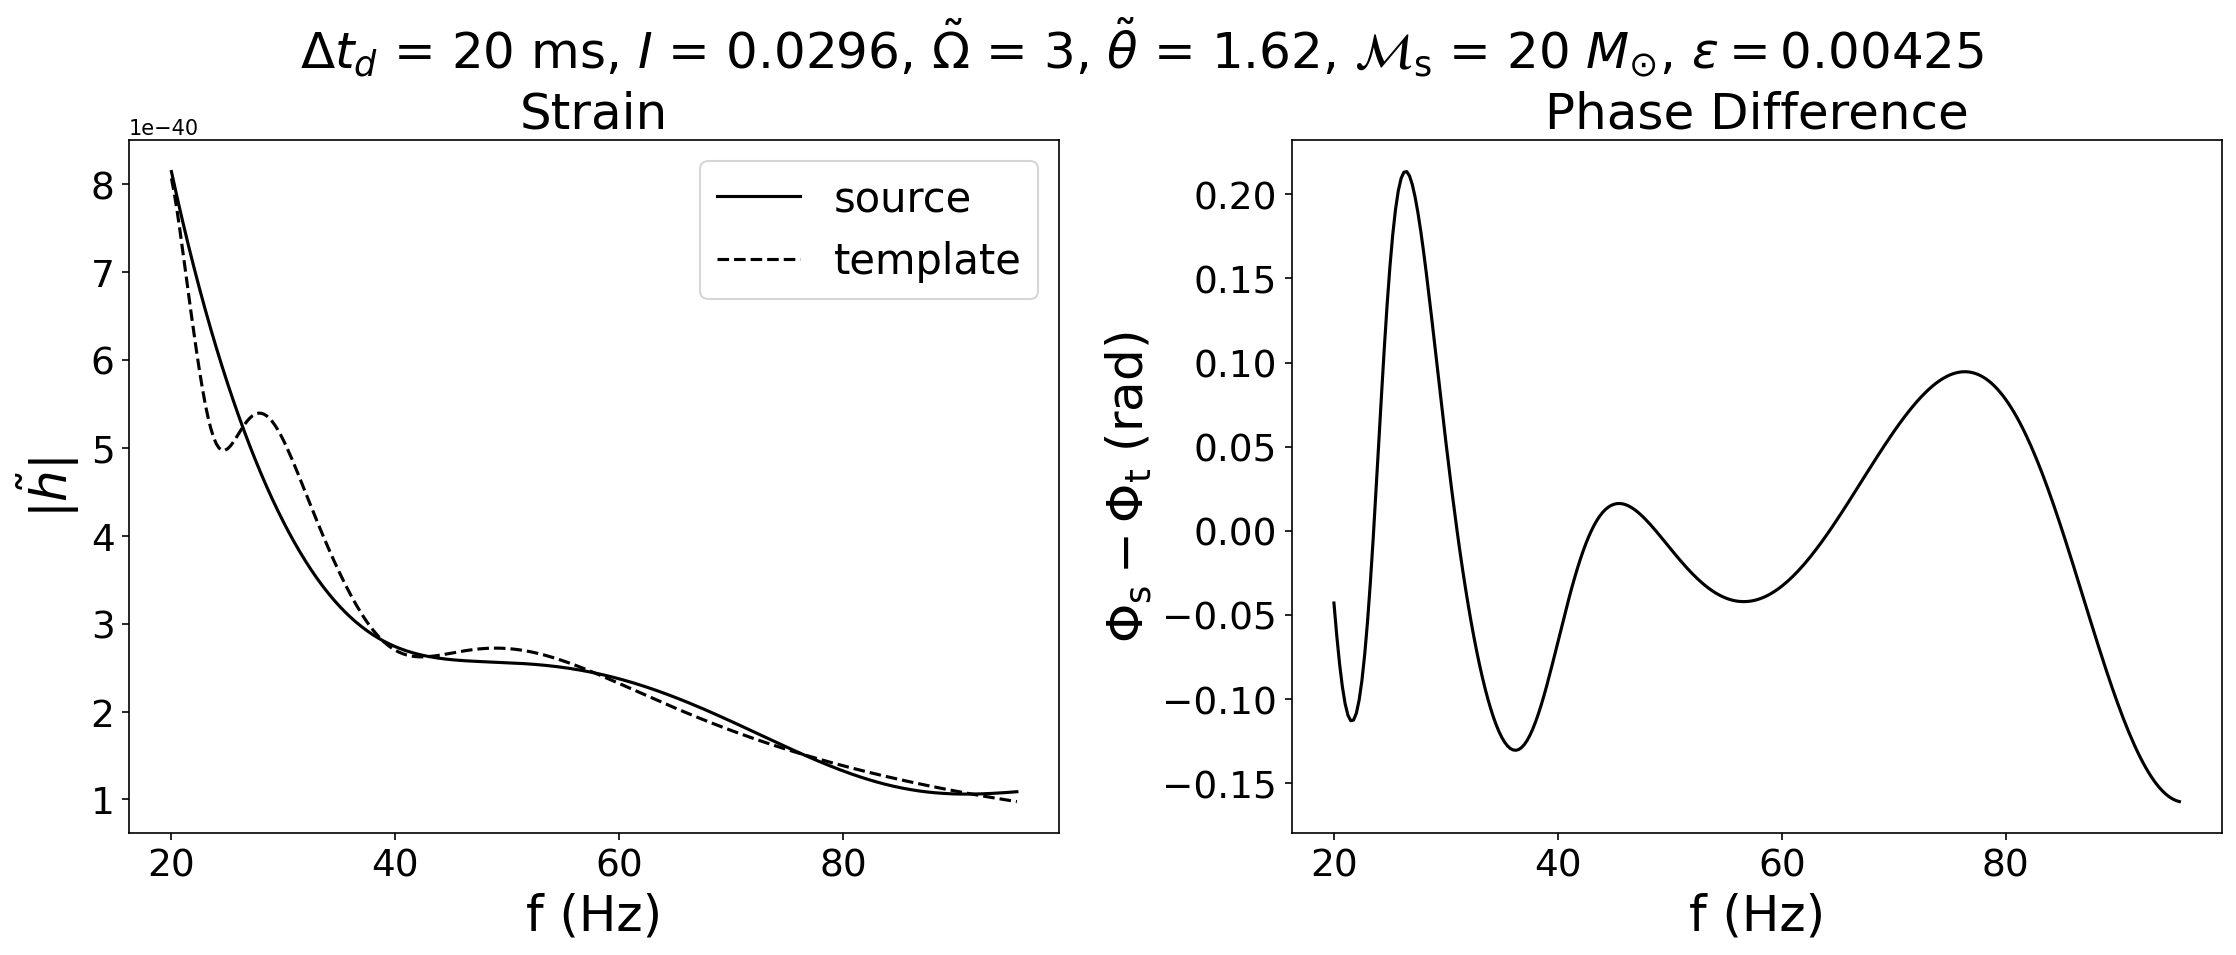

idx = 1.76502e-09, phi = -1.80565e-08, both should be ~0 if get_updated_mismatch_results is True


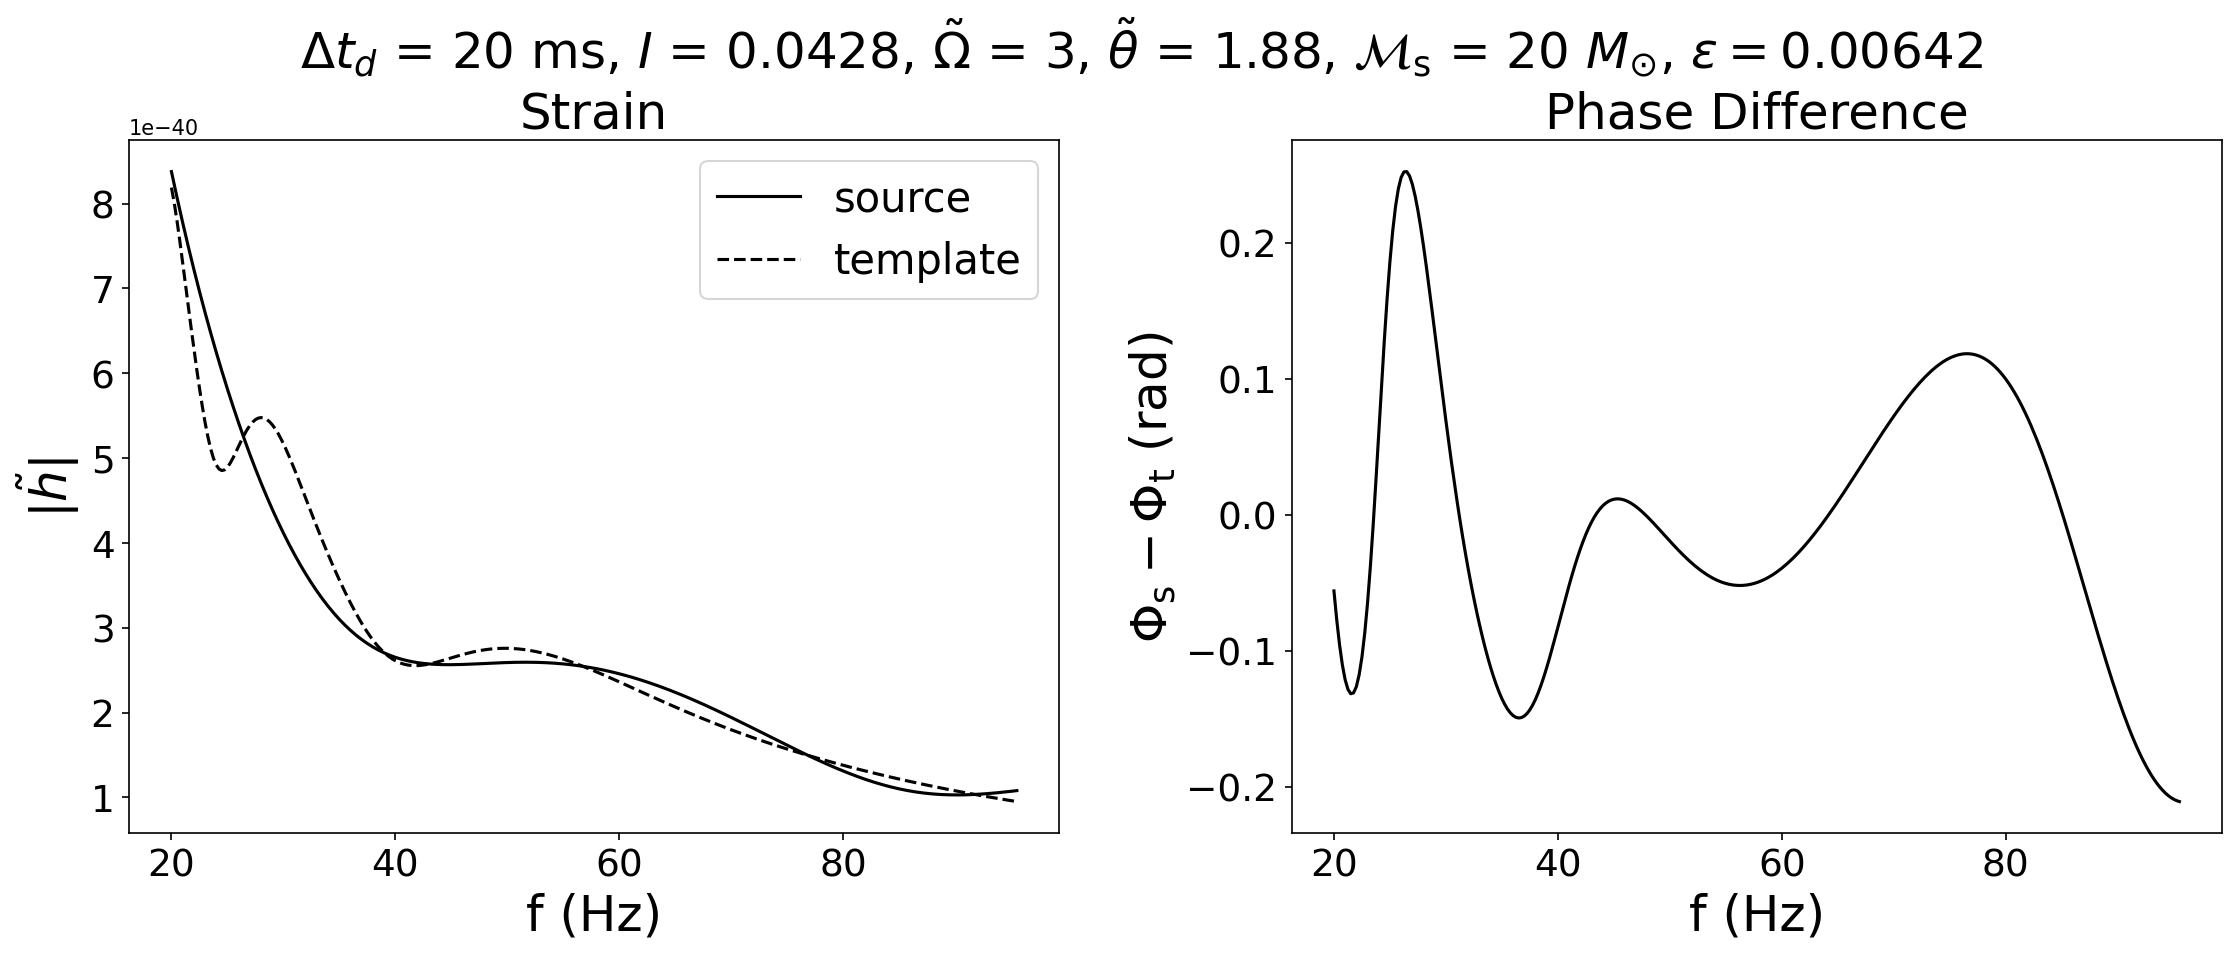

idx = 3.68985e-09, phi = 1.668e-08, both should be ~0 if get_updated_mismatch_results is True


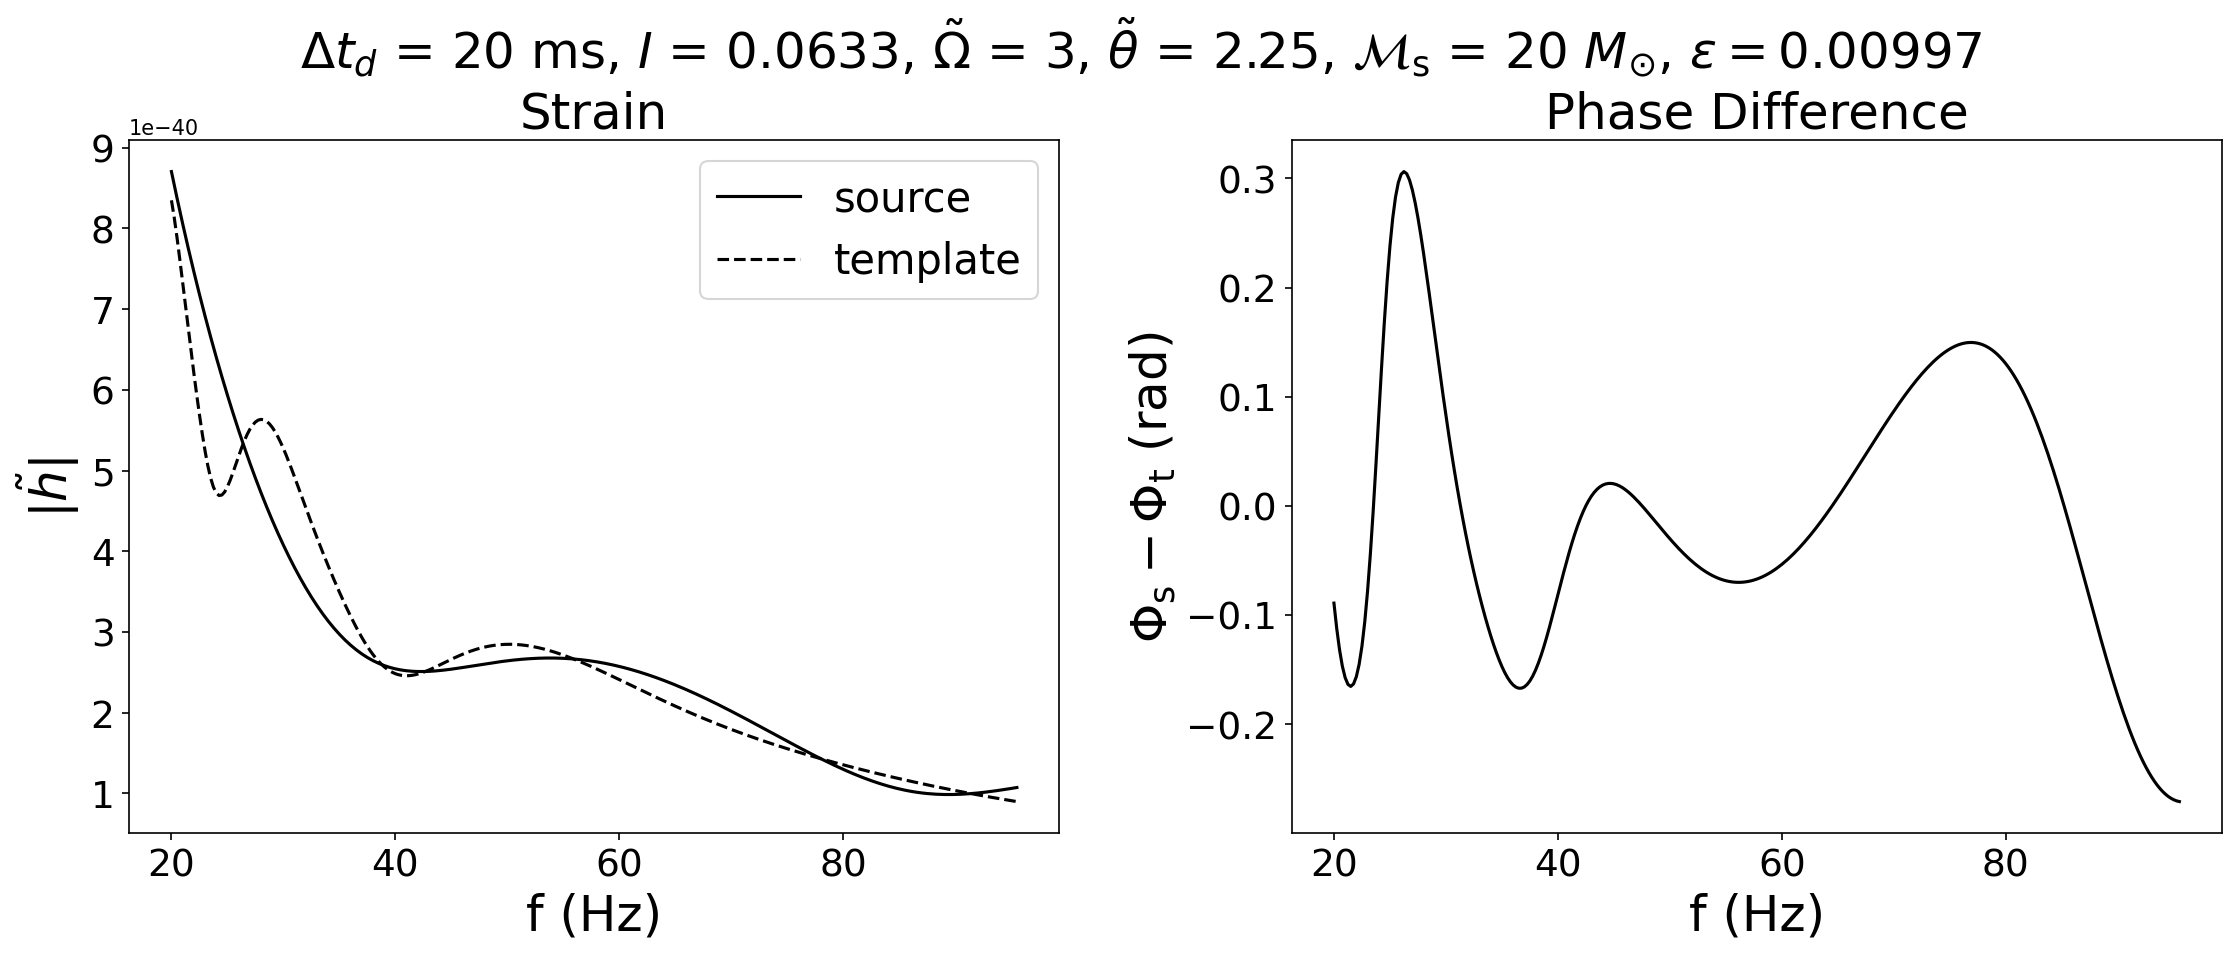

idx = -4.40483e-09, phi = 1.87818e-08, both should be ~0 if get_updated_mismatch_results is True


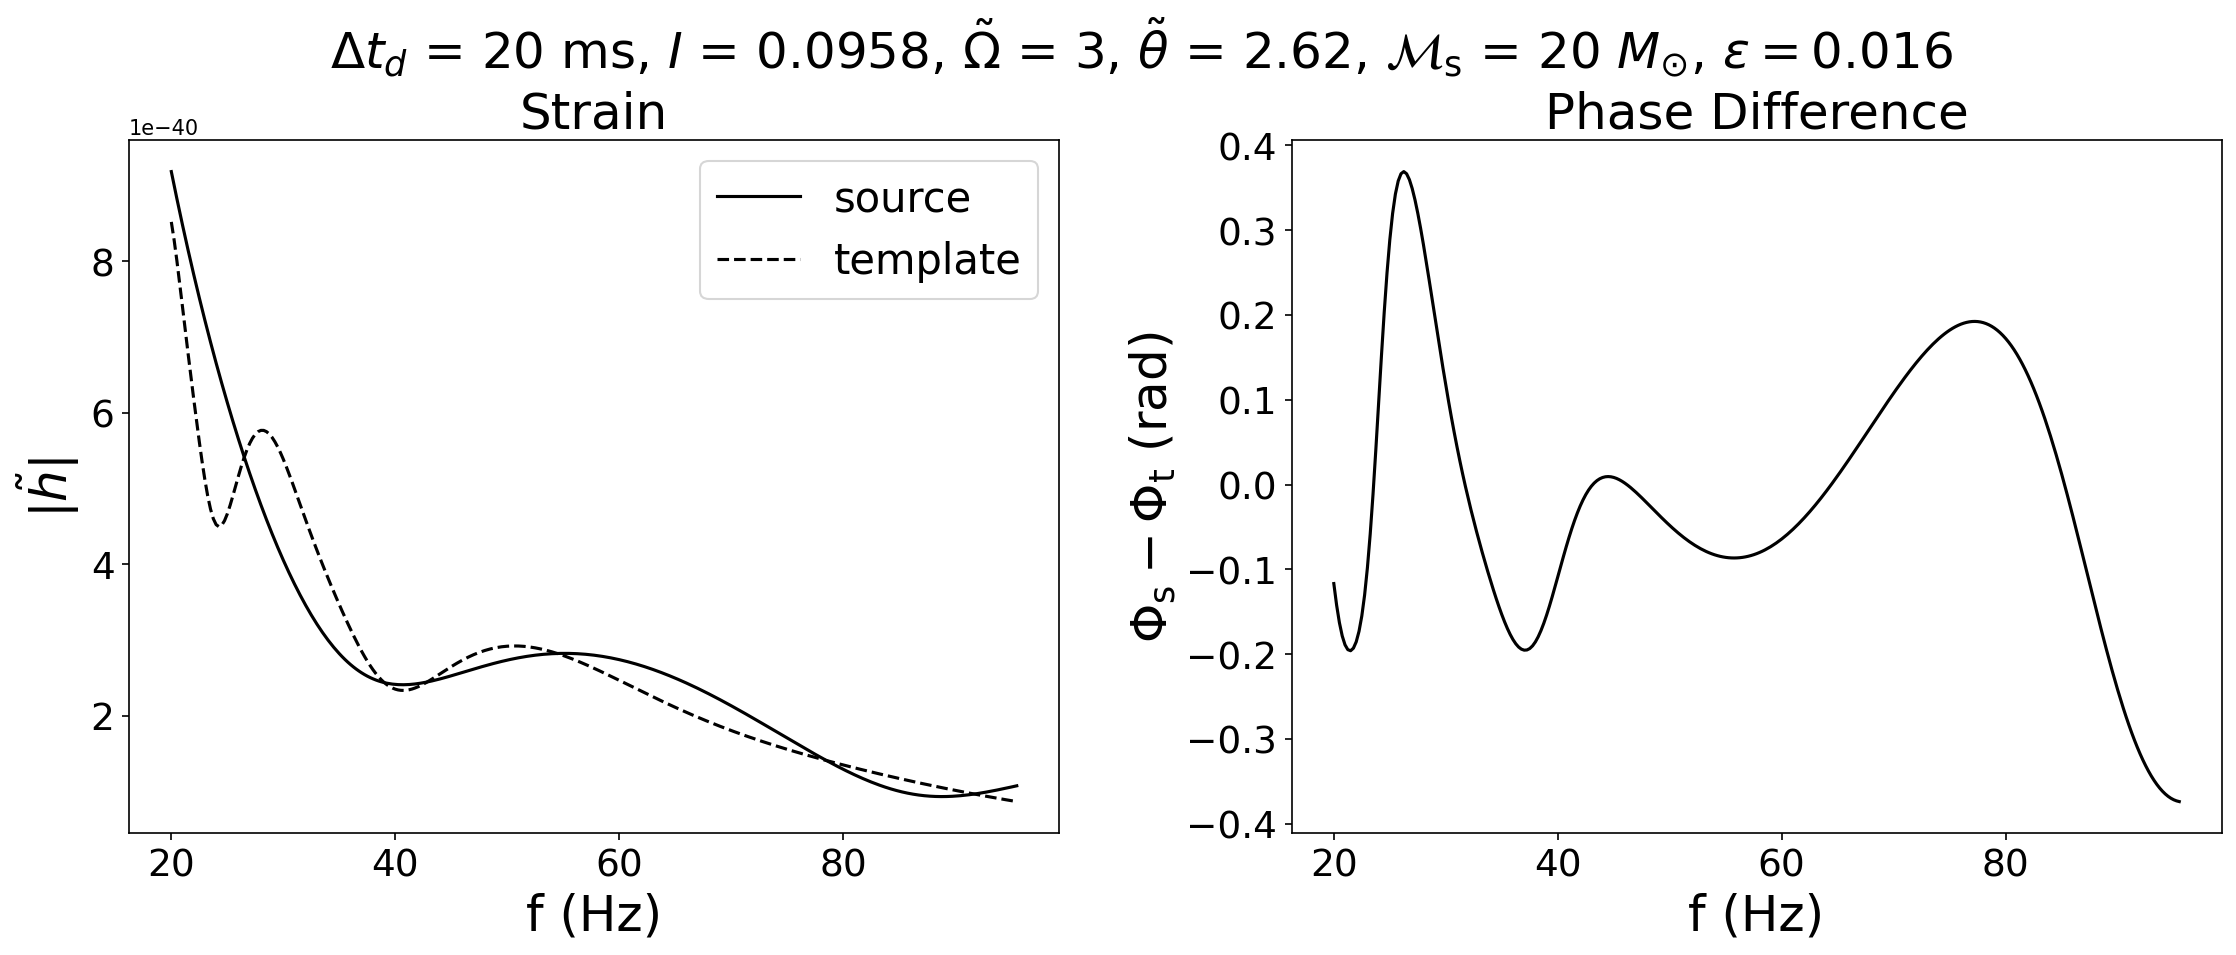

idx = 6.73444e-09, phi = -1.95649e-08, both should be ~0 if get_updated_mismatch_results is True


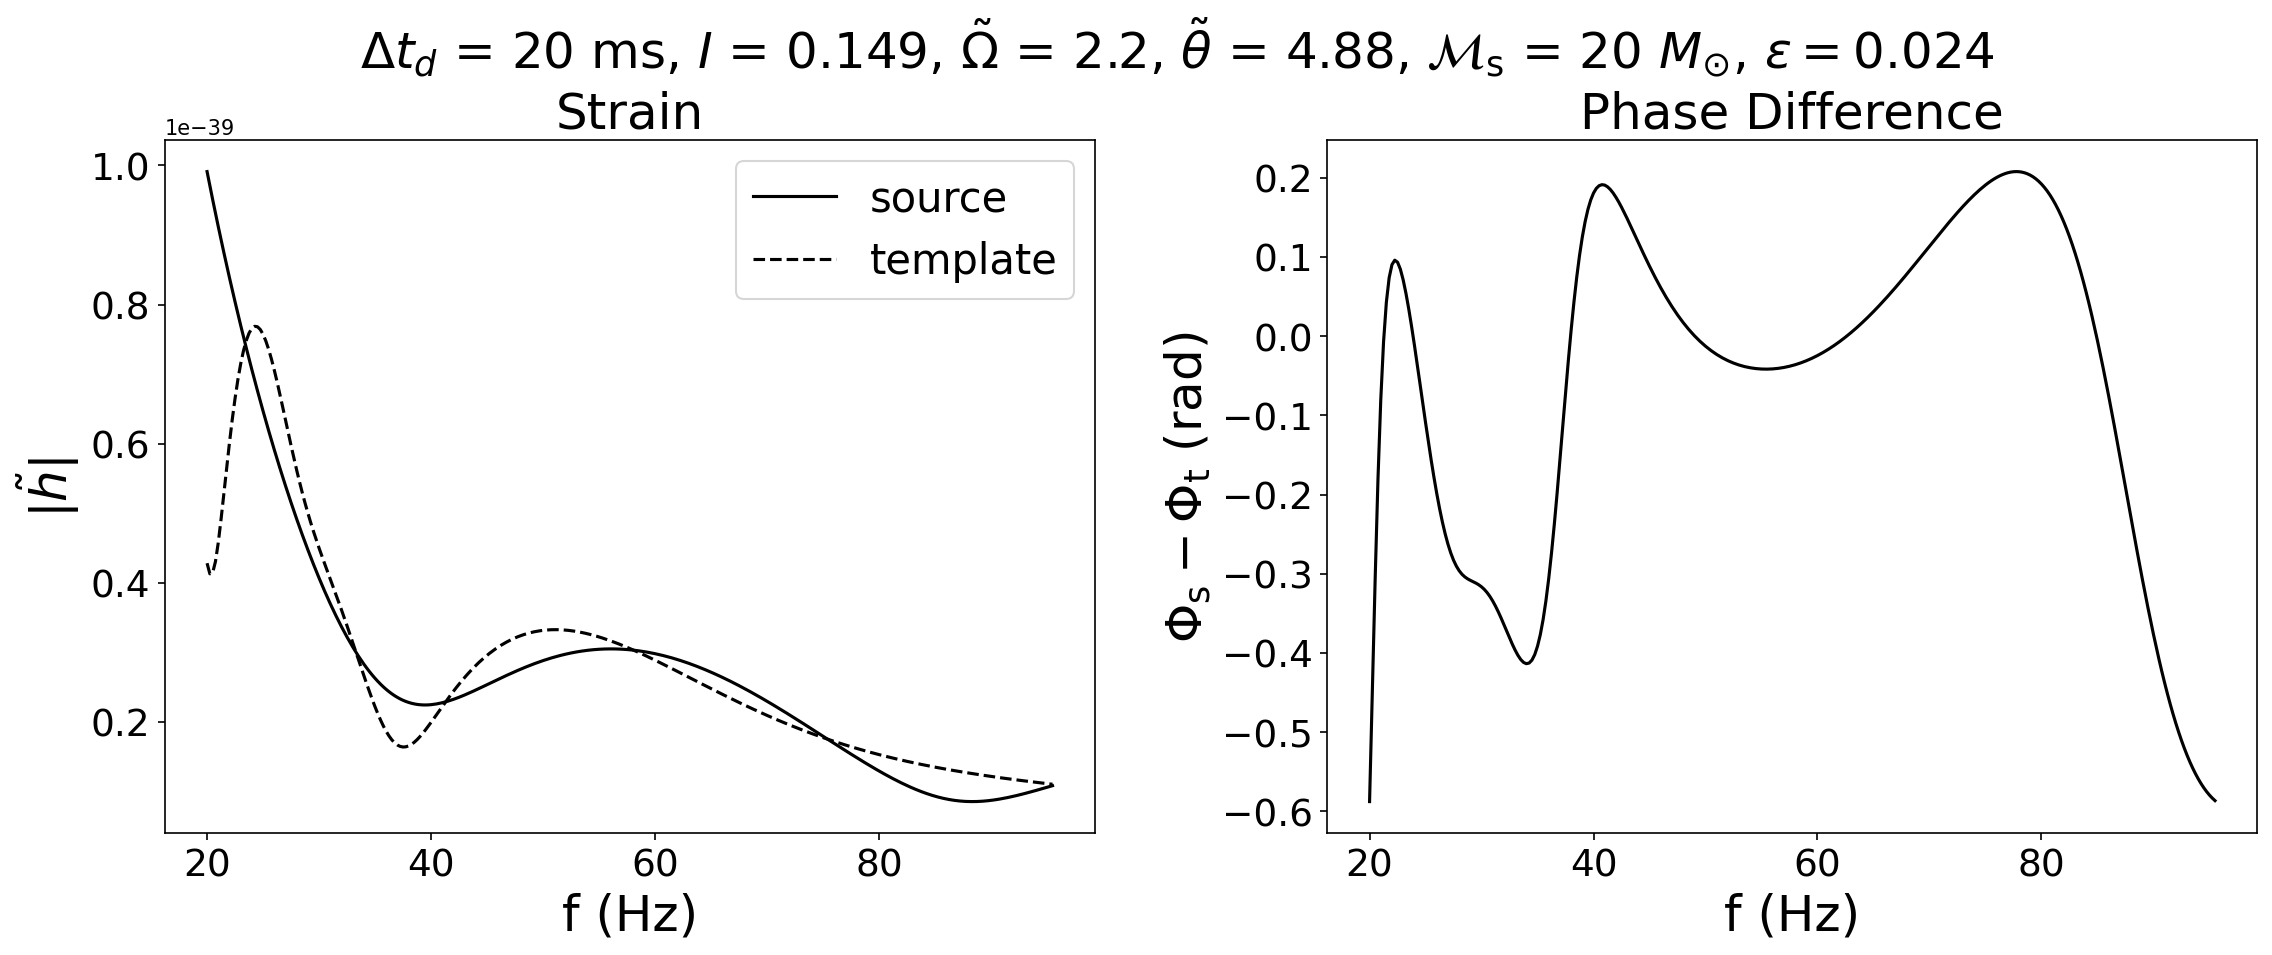

idx = 1.01878e-08, phi = 1.94187e-08, both should be ~0 if get_updated_mismatch_results is True


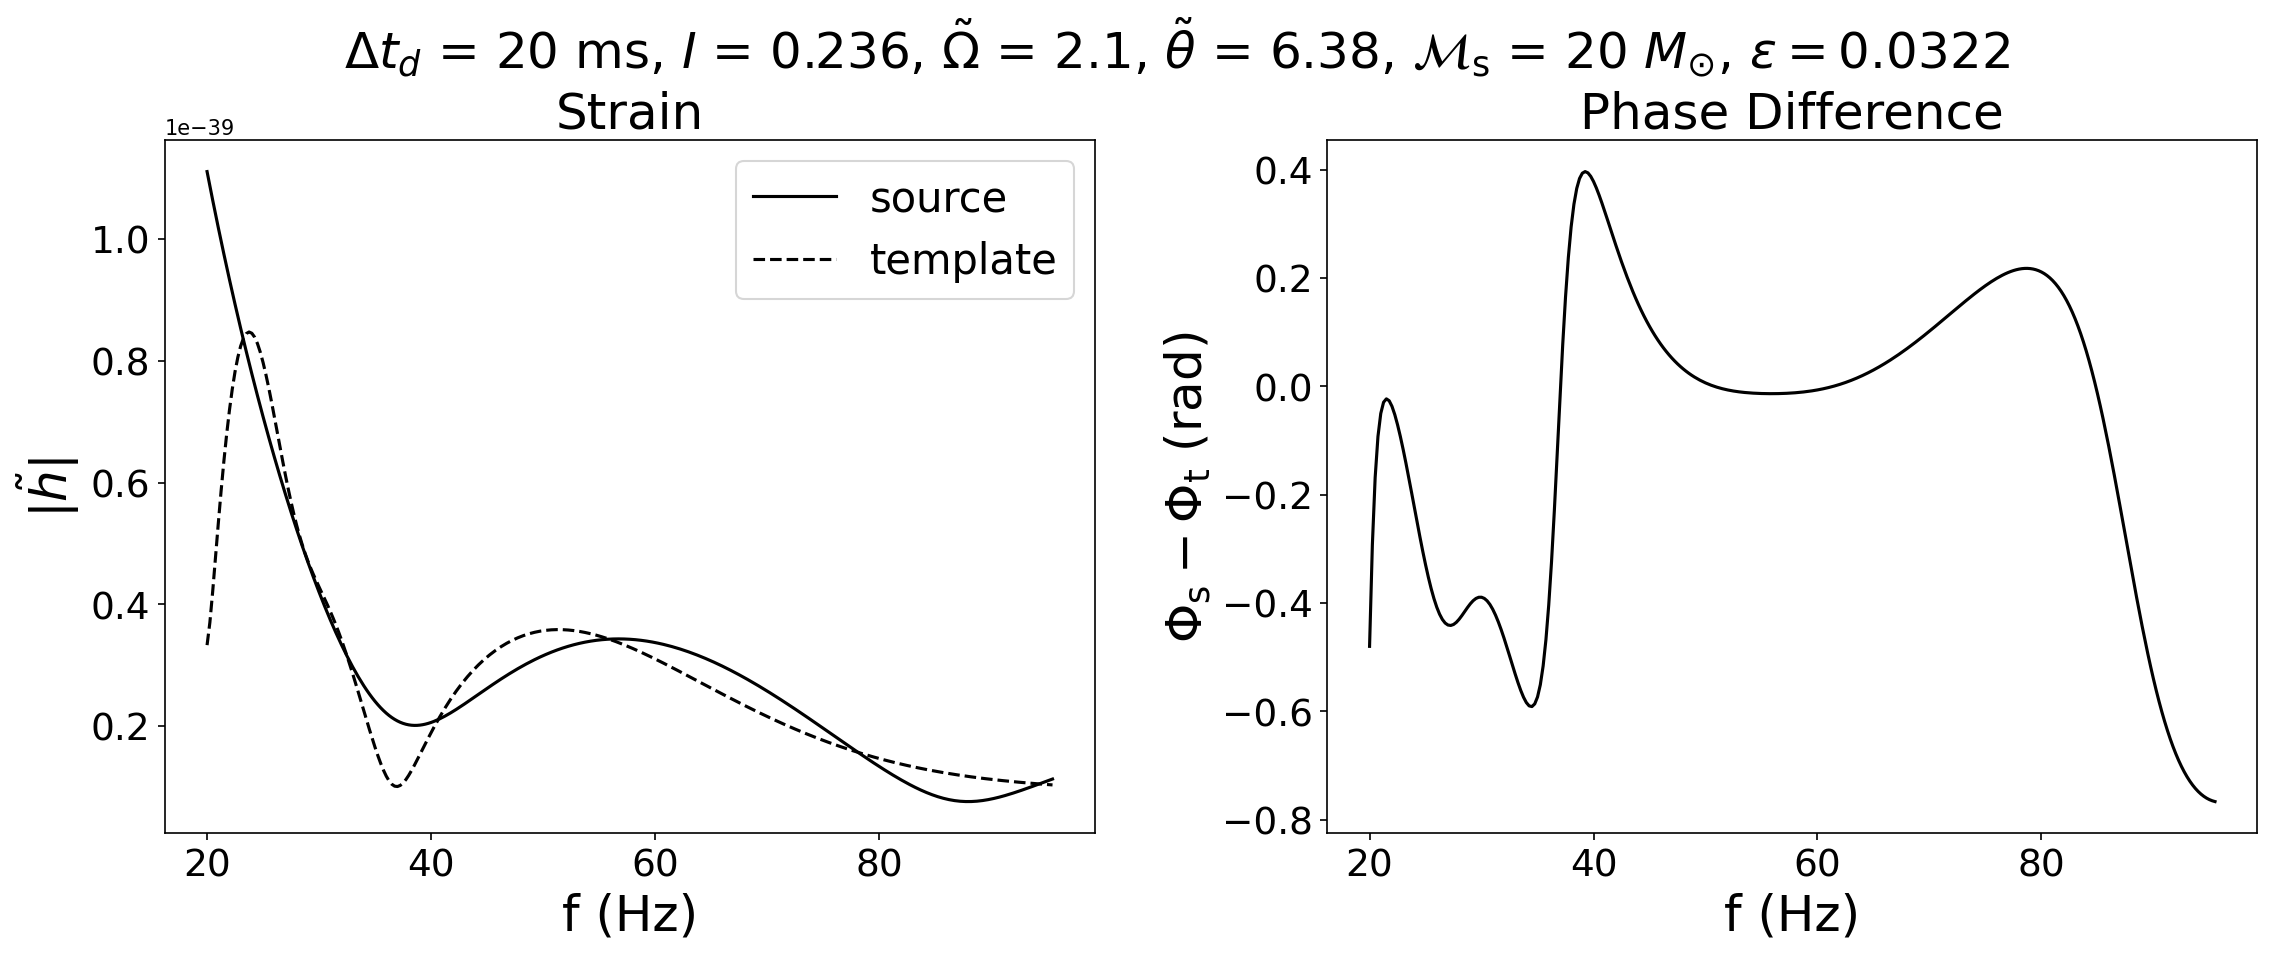

In [20]:
lens_params_2 = data_I["source_params"]
RP_params_2 = copy.deepcopy(RP_params_1)
RP_params_2["mcz"] = lens_params_2["mcz"]

y_arr = data_I["y_arr"]
MLz_arr = data_I["MLz_arr"]
I_arr = data_I["I_arr"]

for i in range(0, len(y_arr), 20):
    lens_params, RP_params = set_to_params(lens_params_2, RP_params_2)
    lens_params["y"] = y_arr[i]
    lens_params["MLz"] = MLz_arr[i] * solar_mass
    RP_params["omega_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_omega_tilde"]
    RP_params["theta_tilde"] = data_I[I_arr[i]]["stats"]["ep_min_theta_tilde"]
    RP_params["gamma_P"] = data_I[I_arr[i]]["stats"]["ep_min_gammaP"]

    plot_waveform_comparison(RP_params, lens_params, get_updated_mismatch_results=True)
    plt.show()